In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
inputFilePath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
inputDataFrame1 = pd.read_csv(filepath_or_buffer = inputFilePath, na_values='?', skipinitialspace=True, 
                             names  = ['buying', 'maint', 'doors','persons','lug_boot','safety', 'class'])
inputDataFrame1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
inputDataFrame1.shape

(1728, 7)

In [5]:
inputDataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
#As all the columns are categorical, check for unique values of each column

for i in inputDataFrame1.columns:
    print(inputDataFrame1[i].unique(),"\t",inputDataFrame1[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [7]:
#Check how these unique categories are distributed among the columns

for i in inputDataFrame1.columns:
    print(inputDataFrame1[i].value_counts())
    print()

high     432
vhigh    432
med      432
low      432
Name: buying, dtype: int64

high     432
vhigh    432
med      432
low      432
Name: maint, dtype: int64

4        432
3        432
5more    432
2        432
Name: doors, dtype: int64

4       576
more    576
2       576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

high    576
med     576
low     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



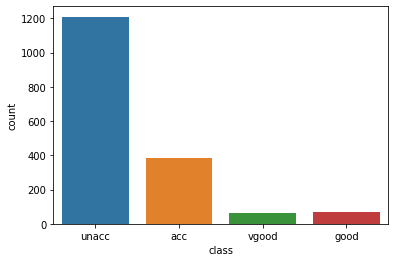

In [8]:
#From above output, it is clear that all the columns except 'class' are distributed equally among data.

sns.countplot(inputDataFrame1['class'])
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig1" + str(i) +".png")

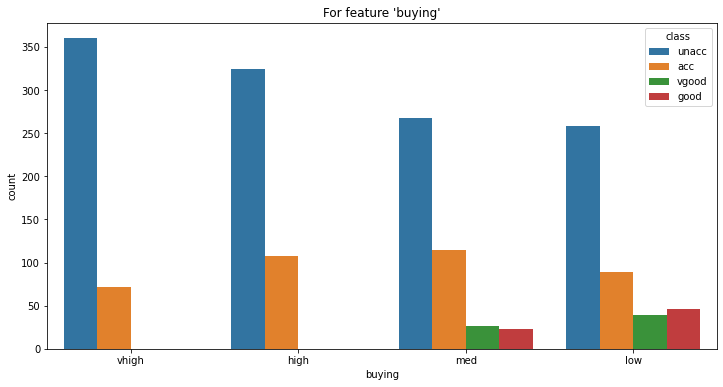

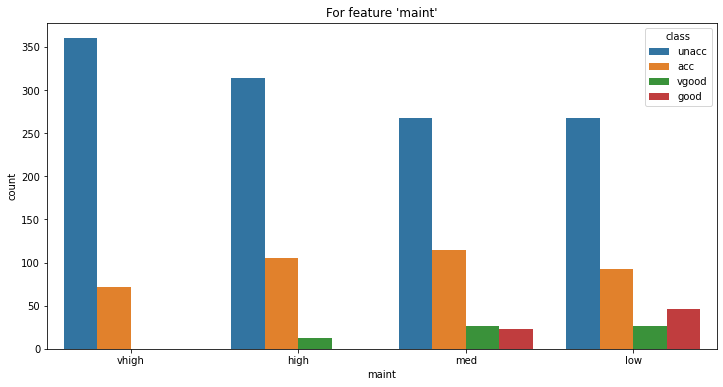

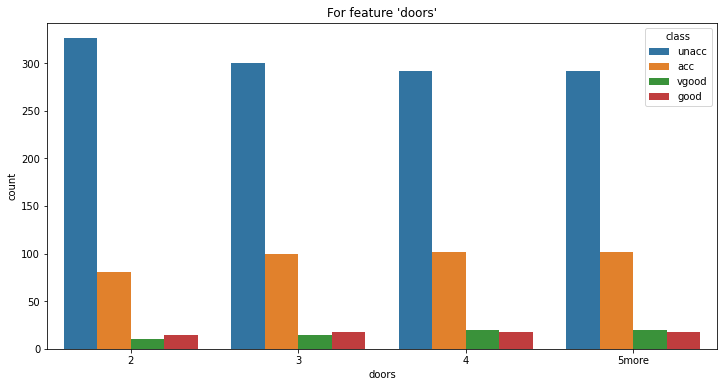

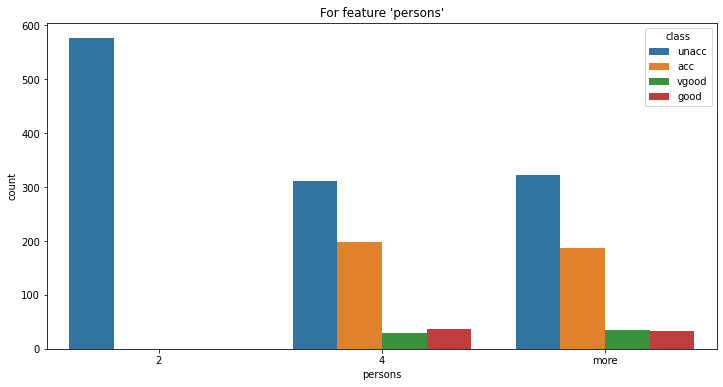

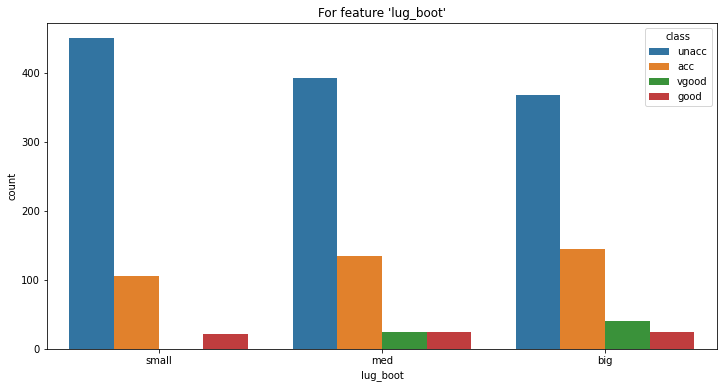

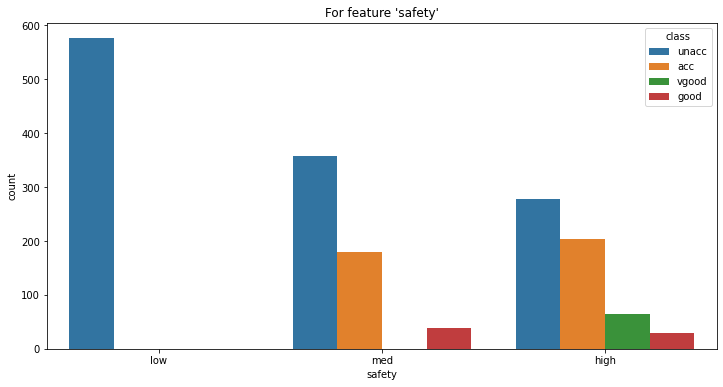

In [9]:
#how the 'class' is distributed for each of the feature in our data.

for i in inputDataFrame1.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(inputDataFrame1[i],hue=inputDataFrame1['class'])
    plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig2_" + str(i) +".png")

In [10]:
#converting string categories to integers
inputDataFrame = pd.DataFrame(columns = list(inputDataFrame1.columns), 
                   index = list(inputDataFrame1.index))
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in inputDataFrame1.columns:
    inputDataFrame[i]=le.fit_transform(inputDataFrame1[i])
inputDataFrame.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


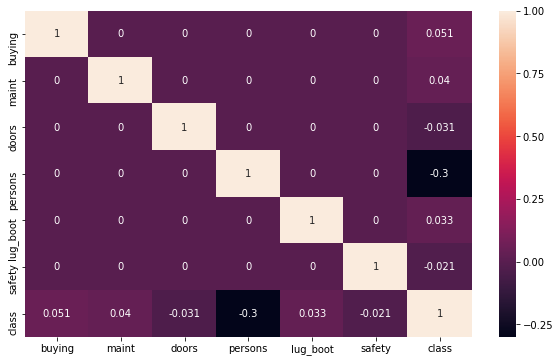

In [11]:
#Heatmap of the columns on dataset with each other. It shows Pearson's correlation coefficient of column w.r.t other columns.

fig=plt.figure(figsize=(10,6))
sns.heatmap(inputDataFrame.corr(),annot=True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig3.png")

In [12]:
#Ignoring the diagonal values, it can be seen that most of the columns shows very weak correlation with 'class'. 
#'persons' column is showning a weak relation with 'class'. 
#Other columns except 'class' shows no correlation with each other.
#So, plotting these columns with each other or doing any analysis on them may not give any productive output.

In [13]:
X=inputDataFrame[inputDataFrame.columns[:-1]]
y=inputDataFrame['class']

In [14]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [15]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int32

In [16]:
print(y.unique())
print(inputDataFrame1['class'].unique())
inputDataFrame1.head()

[2 0 3 1]
['unacc' 'acc' 'vgood' 'good']


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
#for classification reuslts

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [19]:
final_matrix_results = np.zeros((9,7)) 
#train and test accuracies for each best selected method
#f1 scores for each class and for the whole model

DECISION TREE

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

entropy vs gini

In [21]:
clf_decisionTree_e = DecisionTreeClassifier(criterion= "entropy", random_state=100, min_samples_leaf=10)
clf_decisionTree_e.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

accuracy = 95.28535980148884 %

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       266
           1       0.82      0.72      0.77        50
           2       1.00      0.96      0.98       852
           3       0.82      1.00      0.90        41

    accuracy                           0.95      1209
   macro avg       0.88      0.91      0.89      1209
weighted avg       0.96      0.95      0.95      1209

confusion matrix :
[[820  28   0   4]
 [  4 255   3   4]
 [  0   0  41   0]
 [  0   8   6  36]]


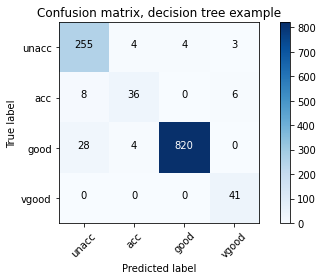

In [22]:
plt.grid(False)

predict_decisionTree_e = clf_decisionTree_e.predict(x_train)
print ("accuracy = {} %\n".format(classification_report(y_train,predict_decisionTree_e, output_dict=True)['accuracy']*100))
print (classification_report(y_train, predict_decisionTree_e))
print ("confusion matrix :")
print(confusion_matrix(y_train, predict_decisionTree_e, labels=[2, 0, 3, 1]))
plot_confusion_matrix(confusion_matrix(y_train, predict_decisionTree_e), classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, decision tree example')

accuracy = 95.28535980148884 %



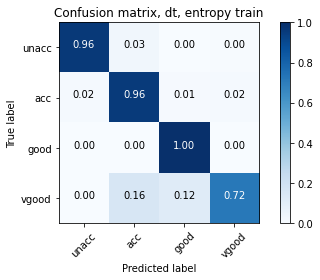

In [23]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_train, predict_decisionTree_e,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_train,predict_decisionTree_e, output_dict=True)['accuracy']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, dt, entropy train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig4.png", bbox_inches='tight')

In [24]:
predict_e_test = clf_decisionTree_e.predict(x_test)
print ("accuracy = {} %\n".format(classification_report(y_test,predict_e_test, output_dict=True)['accuracy']*100))
print (classification_report(y_test, predict_e_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, predict_e_test, labels=[2, 0, 3, 1]))

accuracy = 93.83429672447014 %

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       118
           1       0.55      0.58      0.56        19
           2       0.99      0.97      0.98       358
           3       0.80      1.00      0.89        24

    accuracy                           0.94       519
   macro avg       0.81      0.86      0.83       519
weighted avg       0.94      0.94      0.94       519

confusion matrix :
[[349   9   0   0]
 [  3 103   3   9]
 [  0   0  24   0]
 [  0   5   3  11]]


accuracy = 93.83429672447014 %



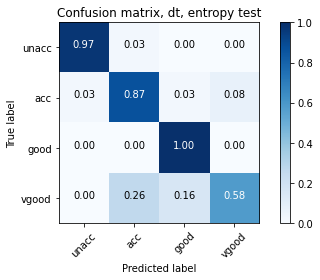

In [25]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predict_e_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test,predict_e_test, output_dict=True)['accuracy']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, dt, entropy test', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig5.png", bbox_inches='tight')

accuracy = 93.83429672447014 %



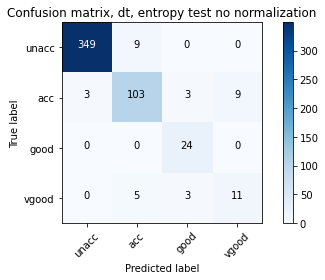

In [26]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predict_e_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test,predict_e_test, output_dict=True)['accuracy']*100))

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, dt, entropy test no normalization')

In [27]:
clf_decisionTree_g = DecisionTreeClassifier(criterion= "gini", random_state=100, min_samples_leaf=10)
clf_decisionTree_g.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [28]:
predict_decisionTree_g = clf_decisionTree_g.predict(x_train)
print ("accuracy = {} %\n".format(classification_report(y_train,predict_decisionTree_g, output_dict=True)['accuracy']*100))
print (classification_report(y_train, predict_decisionTree_g))
print ("confusion matrix :")
print(confusion_matrix(y_train, predict_decisionTree_g, labels=[2, 0, 3, 1]))

accuracy = 94.78908188585608 %

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       266
           1       0.76      0.82      0.79        50
           2       1.00      0.96      0.98       852
           3       0.78      0.88      0.83        41

    accuracy                           0.95      1209
   macro avg       0.85      0.90      0.87      1209
weighted avg       0.95      0.95      0.95      1209

confusion matrix :
[[820  28   0   4]
 [  4 249   9   4]
 [  0   0  36   5]
 [  0   8   1  41]]


accuracy = 94.78908188585608 %



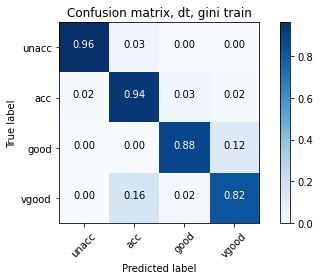

In [29]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_train, predict_decisionTree_g,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_train,predict_decisionTree_g, output_dict=True)['accuracy']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, dt, gini train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig6.png", bbox_inches='tight')

In [30]:
predict_g_test = clf_decisionTree_g.predict(x_test)
print ("accuracy = {} %\n".format(classification_report(y_test,predict_g_test, output_dict=True)['accuracy']*100))
print (classification_report(y_test, predict_g_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, predict_g_test, labels=[2, 0, 3, 1]))

accuracy = 93.25626204238921 %

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       118
           1       0.46      0.63      0.53        19
           2       0.99      0.97      0.98       358
           3       0.81      0.88      0.84        24

    accuracy                           0.93       519
   macro avg       0.79      0.84      0.81       519
weighted avg       0.94      0.93      0.94       519

confusion matrix :
[[349   8   1   0]
 [  3 102   2  11]
 [  0   0  21   3]
 [  0   5   2  12]]


accuracy = 93.25626204238921 %



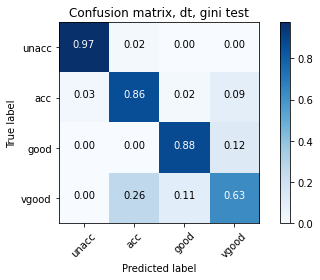

In [31]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predict_g_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test,predict_g_test, output_dict=True)['accuracy']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, dt, gini test', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig7.png", bbox_inches='tight')

In [32]:
b_v_matrix = np.zeros((50, 3))

for maxdepth in range(1, 50):
    decisionTree = DecisionTreeClassifier(random_state=123, max_depth=maxdepth)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(decisionTree, x_train.to_numpy(), y_train.to_numpy(),
                                                                x_test.to_numpy(), y_test.to_numpy(), loss='0-1_loss', 
                                                                random_seed=123)
    b_v_matrix[maxdepth] = [avg_expected_loss, avg_bias, avg_var]

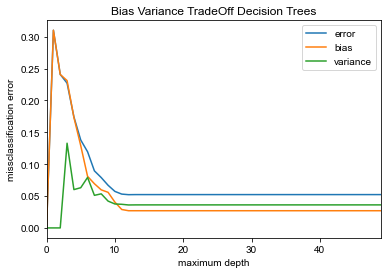

In [33]:
b_v_df = pd.DataFrame(b_v_matrix)
b_v_df.columns = ['error', 'bias', 'variance']

b_v_df.plot(title = "Bias Variance TradeOff Decision Trees")
plt.ylabel('missclassification error')
plt.xlabel('maximum depth')
plt.grid(False)
sns.set_style("white")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig8.png")

In [34]:
b_v_df.iloc[1:,0].min()
b_v_df[b_v_df['error'] == b_v_df.iloc[1:,0].min()]

,error,bias,variance
12,0.052158,0.026975,0.036012


In [35]:
b_v_matrix2 = np.zeros((150, 3))

for maxleafnodes in range(2, 150):
    decisionTree = DecisionTreeClassifier(random_state=123, max_leaf_nodes=maxleafnodes)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(decisionTree, x_train.to_numpy(), y_train.to_numpy(),
                                                                x_test.to_numpy(), y_test.to_numpy(), loss='0-1_loss', 
                                                                random_seed=123)
    b_v_matrix2[maxleafnodes] = [avg_expected_loss, avg_bias, avg_var]

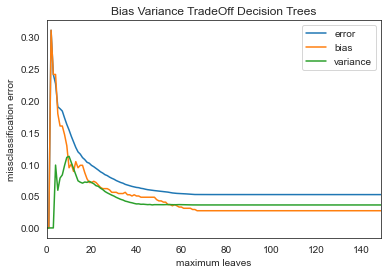

In [36]:
b_v_df2 = pd.DataFrame(b_v_matrix2)
b_v_df2.columns = ['error', 'bias', 'variance']
b_v_df2.plot(title = "Bias Variance TradeOff Decision Trees")
plt.ylabel('missclassification error')
plt.xlabel('maximum leaves')
plt.grid(False)
sns.set_style("white")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig9.png")

In [37]:
minim = min([i for i in b_v_df2.iloc[1:,0] if i > 0])
b_v_df2[b_v_df2['error'] == minim]

,error,bias,variance
80,0.052274,0.026975,0.036021


In [38]:
decisionTree__ = DecisionTreeClassifier(random_state=123, max_leaf_nodes=80, max_depth=12)
decisionTree__.fit(x_train, y_train)
predict_decisionTree__ = decisionTree__.predict(x_test)
print ("accuracy = {} %\n".format(classification_report(y_test,predict_decisionTree__, output_dict=True)['accuracy']*100))
print ("f1-score = {} %\n".format(classification_report(y_test,predict_decisionTree__, output_dict=True)['macro avg']['f1-score']*100))
print (classification_report(y_test, predict_decisionTree__))

accuracy = 97.10982658959537 %

f1-score = 92.50597184243779 %

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519



<Figure size 1152x2304 with 0 Axes>

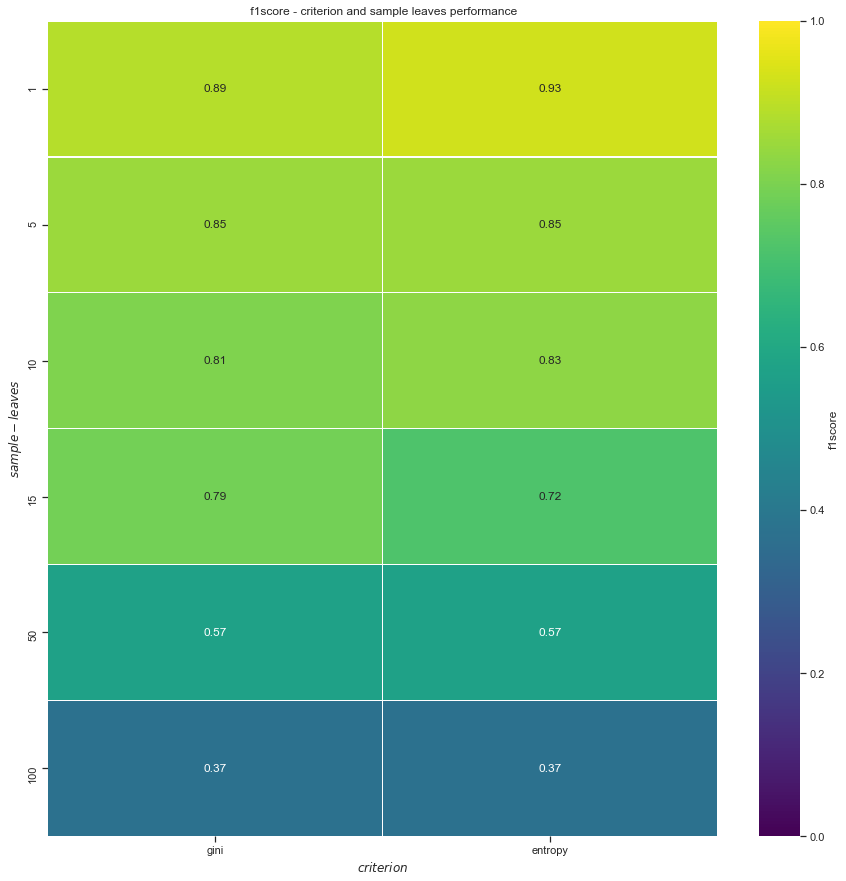

In [39]:
plt.figure(figsize=(16, 32))

sample_leaves = [1,5,10,15,50, 100]
criterion = ["gini", "entropy"]
accuracies_trees = np.zeros((len(sample_leaves), len(criterion)))
f1scores_trees = np.zeros((len(sample_leaves), len(criterion)))


for sl in range(len(sample_leaves)):
    for c in range(len(criterion)):        
        clf_decisionTree_ = DecisionTreeClassifier(criterion= criterion[c], random_state=100, min_samples_leaf=sample_leaves[sl])
        clf_decisionTree_.fit(x_train, y_train)
        predict_decisionTree_ = clf_decisionTree_.predict(x_test)
        mydict_trees = classification_report(y_test, predict_decisionTree_, output_dict=True)
        accuracies_trees[sl][c] = mydict_trees["accuracy"]
        f1scores_trees[sl][c] = mydict_trees['macro avg']['f1-score']
        
sns.set()
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1scores_trees, annot=True, ax=ax, cmap="viridis", xticklabels=criterion, cbar_kws={'label': 'f1score'}, yticklabels=sample_leaves, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1score - criterion and sample leaves performance")
ax.set_ylabel("$sample - leaves$")
ax.set_xlabel("$criterion$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig10.png")

In [40]:
best_tree = DecisionTreeClassifier(criterion= 'entropy', random_state=100, min_samples_leaf=1)
best_tree.fit(x_train, y_train)

best_tree_pred_train = best_tree.predict(x_train)
best_tree_pred_test = best_tree.predict(x_test)

train_acc_best_dt =classification_report(y_train,best_tree_pred_train, output_dict=True)['accuracy']
test_acc_best_dt =classification_report(y_test,best_tree_pred_test, output_dict=True)['accuracy']
f1sc_dt = classification_report(y_test,best_tree_pred_test, output_dict=True)['macro avg']['f1-score']
f1sc_class0_dt = classification_report(y_test,best_tree_pred_test, output_dict=True)['0']['f1-score']
f1sc_class1_dt = classification_report(y_test,best_tree_pred_test, output_dict=True)['1']['f1-score']
f1sc_class2_dt = classification_report(y_test,best_tree_pred_test, output_dict=True)['2']['f1-score']
f1sc_class3_dt = classification_report(y_test,best_tree_pred_test, output_dict=True)['3']['f1-score']

final_matrix_results[0,] = [train_acc_best_dt, test_acc_best_dt, f1sc_dt, f1sc_class2_dt, 
                            f1sc_class0_dt, f1sc_class3_dt, f1sc_class1_dt]

print ("train accuracy = {} %\n".format(train_acc_best_dt*100))
print ("test accuracy = {} %\n".format(test_acc_best_dt*100))
print ("test f1-score = {} %\n".format(f1sc_dt*100))

print (classification_report(y_test, best_tree_pred_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, best_tree_pred_test, labels=[2, 0, 3, 1]))

train accuracy = 100.0 %

test accuracy = 97.30250481695568 %

test f1-score = 92.64045902160629 %

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.98      0.97      0.97       519

confusion matrix :
[[355   3   0   0]
 [  1 111   0   6]
 [  0   3  21   0]
 [  0   1   0  18]]


accuracy = 97.30250481695568 %

f1-score = 92.64045902160629 %



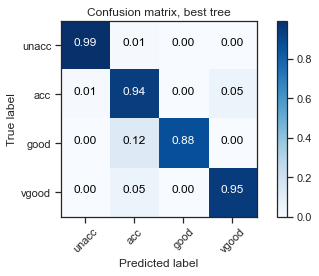

In [41]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, best_tree_pred_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test,best_tree_pred_test, output_dict=True)['accuracy']*100))
print ("f1-score = {} %\n".format(classification_report(y_test,best_tree_pred_test, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, best tree', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig11.png", bbox_inches='tight')

NEURAL NETWORK

In [42]:
import copy
x_neural_net_train=x_train.copy()
y_neural_net_train=y_train.copy()
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(7,12,10), random_state=10, max_iter=1000)

#hidden_layer_sizes: tuple, length = n_layers - 2, default=(100,) (ith element represents the number of neurons in the ith hidden layer.)
#activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
#solver: {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#alpha: float, default=0.0001 (L2 penalty (regularization term) parameter)
#batch_size: int, default=’auto’
#learning_rate: {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’} (Only used when solver='sgd')
#learning_rate_init: double, default=0.001
#max_iter: int, default=200 (solver iterates until convergence, N° OF EPOCHS)
#tol: float, default=1e-4 (Tolerance for the optimization)
#momentum: float, default=0.9 (only used when solver = 'sgd')


y_neural_net_train=y_neural_net_train.values.reshape((1209,))
clf.fit(x_neural_net_train,y_neural_net_train)
predictions = clf.predict(x_neural_net_train)

In [43]:
print ("accuracy = {} %\n".format(classification_report(y_neural_net_train,predictions, output_dict=True)['accuracy']*100))
print(classification_report(y_neural_net_train,predictions))
print ("confusion matrix :")
print(confusion_matrix(y_neural_net_train, predictions, labels=[2, 0, 3, 1]))

accuracy = 99.66914805624482 %

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       266
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       852
           3       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

confusion matrix :
[[850   2   0   0]
 [  2 264   0   0]
 [  0   0  41   0]
 [  0   0   0  50]]


accuracy = 99.66914805624482 %



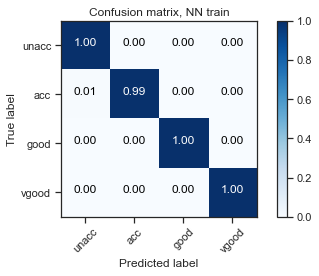

In [44]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_neural_net_train, predictions,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_neural_net_train,predictions, output_dict=True)['accuracy']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, NN train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig12.png", bbox_inches='tight')

In [45]:
predictions_test = clf.predict(x_test)
print ("accuracy = {} %\n".format(classification_report(y_test,predictions_test, output_dict=True)['accuracy']*100))
print ("f1-score = {} %\n".format(classification_report(y_test,predictions_test, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_test,predictions_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, predictions_test, labels=[2, 0, 3, 1]))

accuracy = 95.76107899807322 %

f1-score = 88.64668807587263 %

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       118
           1       0.76      0.84      0.80        19
           2       0.99      0.99      0.99       358
           3       0.81      0.88      0.84        24

    accuracy                           0.96       519
   macro avg       0.87      0.90      0.89       519
weighted avg       0.96      0.96      0.96       519

confusion matrix :
[[353   5   0   0]
 [  4 107   3   4]
 [  0   2  21   1]
 [  0   1   2  16]]


accuracy = 95.76107899807322 %

f1-score = 88.64668807587263 %



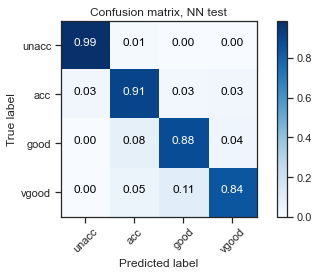

In [46]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predictions_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test,predictions_test, output_dict=True)['accuracy']*100))
print ("f1-score = {} %\n".format(classification_report(y_test,predictions_test, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, NN test', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig13.png", bbox_inches='tight')

<Figure size 1152x2304 with 0 Axes>

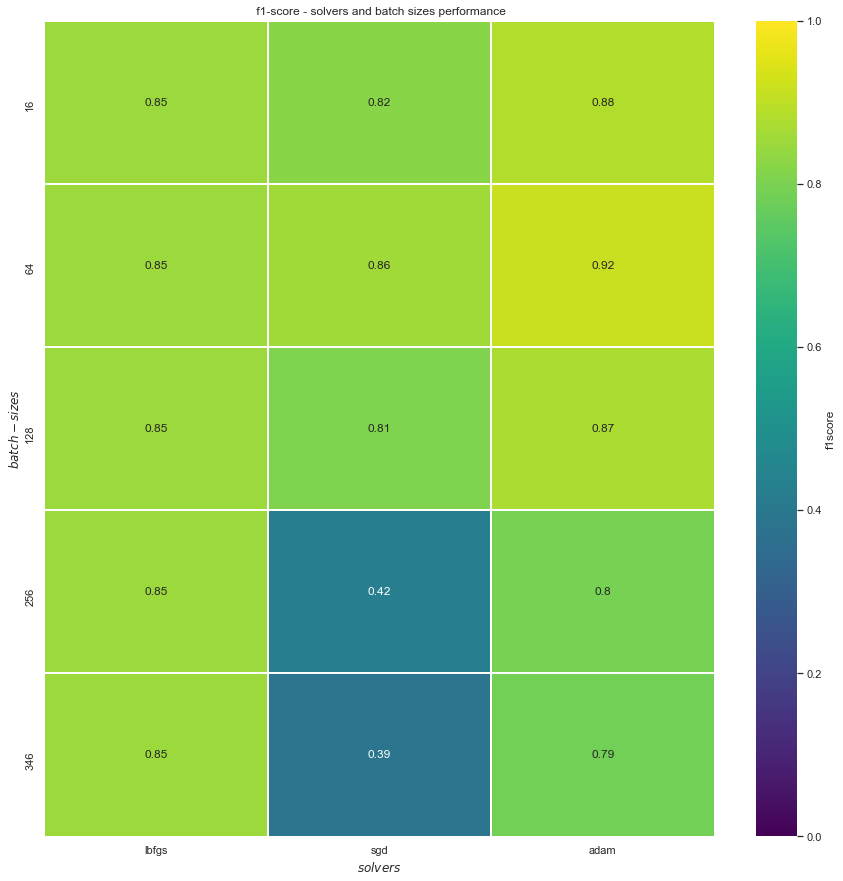

In [47]:
plt.figure(figsize=(16, 32))

solvers = ['lbfgs', 'sgd', 'adam']
batch_sizes = [16, 64, 128, 256, 346]

accuracies_nn1 = np.zeros((len(batch_sizes), len(solvers)))
f1scores_nn1 = np.zeros((len(batch_sizes), len(solvers)))

for s in range(len(solvers)):
    for bs in range(len(batch_sizes)):
        clf_ = MLPClassifier(solver=solvers[s], alpha=0.001,
                            hidden_layer_sizes=(7,12,10), random_state=10, max_iter=1000, batch_size=batch_sizes[bs])
        clf_.fit(x_neural_net_train,y_neural_net_train)
        predictions_ = clf_.predict(x_test)
        mydict_nn1 = classification_report(y_test,predictions_, output_dict=True)
        accuracies_nn1[bs][s] = mydict_nn1["accuracy"]
        f1scores_nn1[bs][s] = mydict_nn1["macro avg"]['f1-score']

sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1scores_nn1, annot=True, ax=ax, cmap="viridis", xticklabels=solvers, cbar_kws={'label': 'f1score'}, yticklabels=batch_sizes, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1-score - solvers and batch sizes performance")
ax.set_ylabel("$batch - sizes$")
ax.set_xlabel("$solvers$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig14.png")

In [48]:
for s in range(len(solvers)):
    for bs in range(len(batch_sizes)):        
        print ("f1 score with solver {} ".format(solvers[s]) + "and size of batches equal {} ".format(batch_sizes[bs]) + " is = {} %\n".format(f1scores_nn1[bs][s]*100))

f1 score with solver lbfgs and size of batches equal 16  is = 85.09939268367752 %

f1 score with solver lbfgs and size of batches equal 64  is = 85.09939268367752 %

f1 score with solver lbfgs and size of batches equal 128  is = 85.09939268367752 %

f1 score with solver lbfgs and size of batches equal 256  is = 85.09939268367752 %

f1 score with solver lbfgs and size of batches equal 346  is = 85.09939268367752 %

f1 score with solver sgd and size of batches equal 16  is = 82.26387403892579 %

f1 score with solver sgd and size of batches equal 64  is = 85.64796056866682 %

f1 score with solver sgd and size of batches equal 128  is = 80.50124057919975 %

f1 score with solver sgd and size of batches equal 256  is = 42.390521463555174 %

f1 score with solver sgd and size of batches equal 346  is = 38.9352053855264 %

f1 score with solver adam and size of batches equal 16  is = 88.29285528450572 %

f1 score with solver adam and size of batches equal 64  is = 91.70734330116518 %

f1 score w

<Figure size 1152x2304 with 0 Axes>

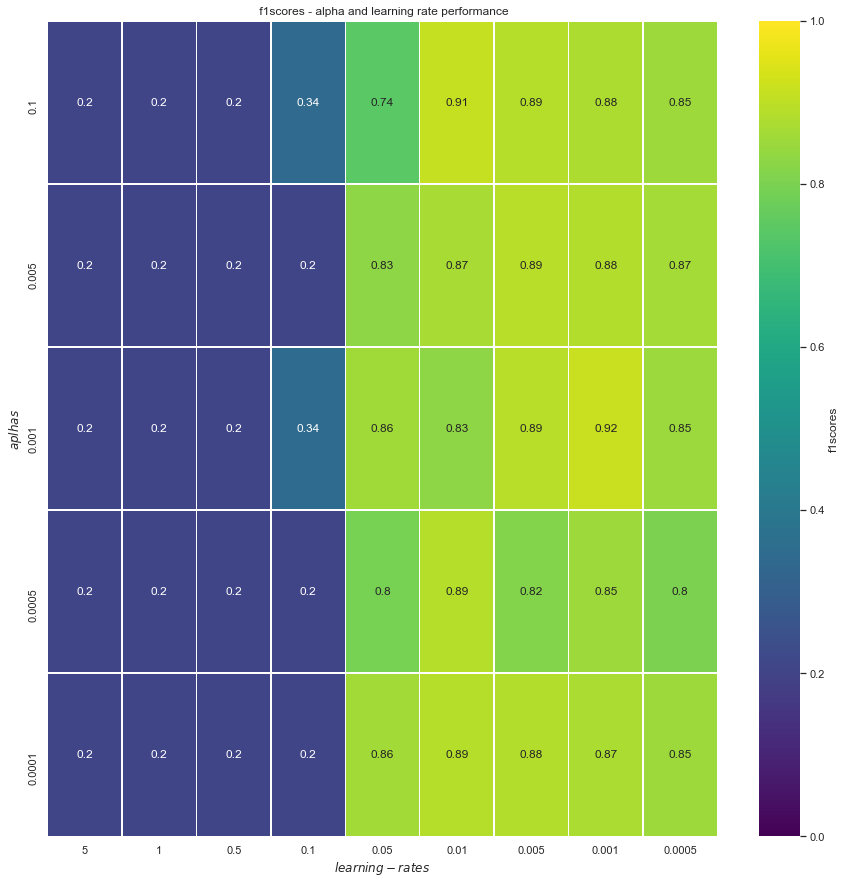

In [49]:
plt.figure(figsize=(16, 32))

alphas = [0.1, 0.005, 0.001, 0.0005, 0.0001]
learning_rates = [5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]

f1scores_nn2 = np.zeros((len(alphas), len(learning_rates)))

for a in range(len(alphas)):
    for lr in range(len(learning_rates)):
       # print(lr)
        clf_ = MLPClassifier(solver='adam', alpha=alphas[a],
                            hidden_layer_sizes=(7,12,10), random_state=10, max_iter=1000, 
                            learning_rate_init = learning_rates[lr], batch_size=64)
        clf_.fit(x_neural_net_train,y_neural_net_train)
        predictions_ = clf_.predict(x_test)
        mydict_nn2 = classification_report(y_test,predictions_, output_dict=True)
        f1scores_nn2[a][lr] = mydict_nn2["macro avg"]["f1-score"]
        

sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1scores_nn2, annot=True, ax=ax, cmap="viridis", xticklabels=learning_rates, cbar_kws={'label': 'f1scores'}, yticklabels=alphas, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1scores - alpha and learning rate performance")
ax.set_ylabel("$aplhas$")
ax.set_xlabel("$learning - rates$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig15.png")

0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5


<Figure size 1152x2304 with 0 Axes>

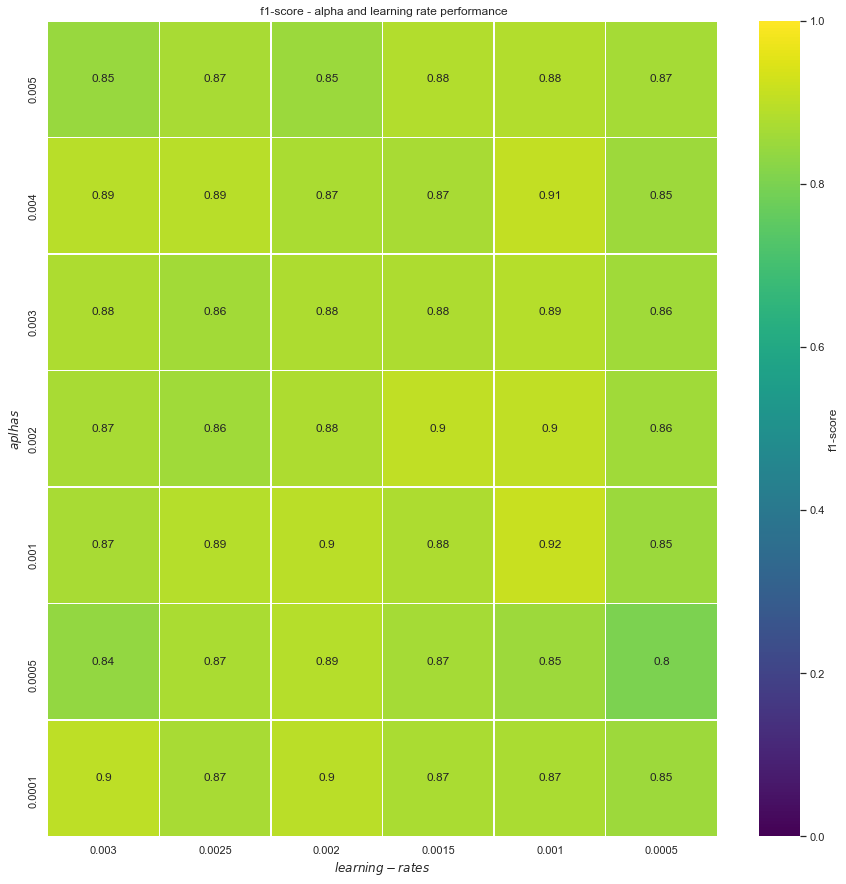

In [50]:
plt.figure(figsize=(16, 32))

alphas = [0.005, 0.004, 0.003, 0.002, 0.001, 0.0005, 0.0001]
learning_rates = [0.003, 0.0025, 0.002, 0.0015, 0.001, 0.0005]

f1scores_nn2_ = np.zeros((len(alphas), len(learning_rates)))

highest_f = 0
alp = 0
learn = 0

for a in range(len(alphas)):
    for lr in range(len(learning_rates)):
        print(lr)
        clf_ = MLPClassifier(solver='adam', alpha=alphas[a],
                            hidden_layer_sizes=(7,12,10), random_state=10, max_iter=1000, 
                            learning_rate_init = learning_rates[lr], batch_size=64)
        clf_.fit(x_neural_net_train,y_neural_net_train)
        predictions_ = clf_.predict(x_test)
        mydict_nn = classification_report(y_test,predictions_, output_dict=True)
        f1scores_nn2_[a][lr] = mydict_nn["macro avg"]['f1-score']
        if f1scores_nn2_[a][lr] > highest_f:
            highest_f = f1scores_nn2_[a][lr]
            alp = alphas[a]
            learn = learning_rates[lr]
        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1scores_nn2_, annot=True, ax=ax, cmap="viridis", xticklabels=learning_rates, cbar_kws={'label': 'f1-score'}, yticklabels=alphas, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1-score - alpha and learning rate performance")
ax.set_ylabel("$aplhas$")
ax.set_xlabel("$learning - rates$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig16.png")

In [51]:
print("highest f1 score is {}% ".format(highest_f*100) + "with alpha = {} ".format(alp) + "and learning rate = {} ".format(learn))

highest f1 score is 91.70734330116518% with alpha = 0.001 and learning rate = 0.001 


In [52]:
clf_best = MLPClassifier(solver='adam', alpha=alp,
                    hidden_layer_sizes=(7,12,10), random_state=10, max_iter=1000, learning_rate_init=learn, batch_size=64)
clf_best.fit(x_neural_net_train,y_neural_net_train)

train_predictions_NN_best = clf_best.predict(x_neural_net_train)
test_predictions_NN_best = clf_best.predict(x_test)

train_acc_NN_best = classification_report(y_neural_net_train,train_predictions_NN_best, output_dict=True)['accuracy']
test_acc_NN_best = classification_report(y_test,test_predictions_NN_best, output_dict=True)['accuracy']
f1sc_nn = classification_report(y_test,test_predictions_NN_best, output_dict=True)['macro avg']['f1-score']
f1sc_class0_nn = classification_report(y_test,test_predictions_NN_best, output_dict=True)['0']['f1-score']
f1sc_class1_nn = classification_report(y_test,test_predictions_NN_best, output_dict=True)['1']['f1-score']
f1sc_class2_nn = classification_report(y_test,test_predictions_NN_best, output_dict=True)['2']['f1-score']
f1sc_class3_nn = classification_report(y_test,test_predictions_NN_best, output_dict=True)['3']['f1-score']

final_matrix_results[1,] = [train_acc_NN_best, test_acc_NN_best,f1sc_nn, f1sc_class2_nn, 
                            f1sc_class0_nn, f1sc_class3_nn, f1sc_class1_nn]

print ("train accuracy = {} %\n".format(train_acc_NN_best*100))
print ("test accuracy = {} %\n".format(test_acc_NN_best*100))
print ("test f1 score = {} %\n".format(f1sc_nn*100))

print(classification_report(y_test,test_predictions_NN_best))
print ("confusion matrix :")
print(confusion_matrix(y_test, test_predictions_NN_best, labels=[2, 0, 3, 1]))

train accuracy = 98.09760132340777 %

test accuracy = 96.14643545279384 %

test f1 score = 91.70734330116518 %

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       118
           1       0.85      0.89      0.87        19
           2       0.98      0.98      0.98       358
           3       0.95      0.83      0.89        24

    accuracy                           0.96       519
   macro avg       0.93      0.91      0.92       519
weighted avg       0.96      0.96      0.96       519

confusion matrix :
[[352   6   0   0]
 [  6 110   0   2]
 [  0   3  20   1]
 [  0   1   1  17]]


accuracy = 96.14643545279384 %

f1 score = 91.70734330116518 %



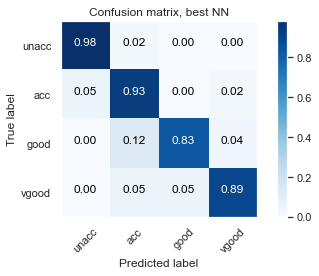

In [53]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, test_predictions_NN_best,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test,test_predictions_NN_best, output_dict=True)['accuracy']*100))
print ("f1 score = {} %\n".format(f1sc_nn*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, best NN', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig17.png", bbox_inches='tight')

SVM

In [54]:
import copy
x_svm_train=x_train.copy()
y_svm_train=y_train.copy()
y_svm_train=y_svm_train.values.reshape((1209,))
y_test_svm=y_test.values.reshape((519,))

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
clf = SVC(kernel='rbf',random_state=20,C=20)
clf.fit(x_svm_train, y_svm_train) 

#C: float, default=1.0 (Regularization parameter. The strength of the regularization is inversely proportional to C)
#kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ (Specifies the kernel type to be used in the algorithm)
#degree: int, default=3 (Degree of the polynomial kernel function (‘poly’))


SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=20,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
predictions = clf.predict(x_svm_train)
print ("accuracy = {} %\n".format(classification_report(y_svm_train,predictions, output_dict=True)['accuracy']*100))
print(classification_report(y_svm_train,predictions))
print ("confusion matrix :")
print(confusion_matrix(y_svm_train, predictions, labels=[2, 0, 3, 1]))

accuracy = 100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       852
           3       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

confusion matrix :
[[852   0   0   0]
 [  0 266   0   0]
 [  0   0  41   0]
 [  0   0   0  50]]


accuracy = 100.0 %



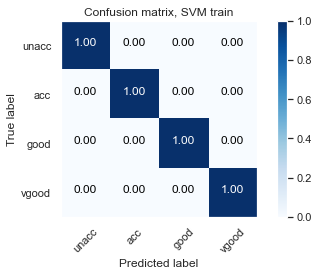

In [57]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_svm_train, predictions,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_svm_train,predictions, output_dict=True)['accuracy']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, SVM train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig18.png", bbox_inches='tight')

In [58]:
predictions_test = clf.predict(x_test)
print ("accuracy = {} %\n".format(classification_report(y_test_svm,predictions_test, output_dict=True)['accuracy']*100))
print ("f1-score = {} %\n".format(classification_report(y_test_svm,predictions_test, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_test_svm,predictions_test))
print ("confusion matrix :")
print(confusion_matrix(y_test_svm, predictions_test, labels=[2, 0, 3, 1]))

accuracy = 98.65125240847784 %

f1-score = 95.28796852747736 %

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       118
           1       0.86      0.95      0.90        19
           2       1.00      1.00      1.00       358
           3       0.92      0.96      0.94        24

    accuracy                           0.99       519
   macro avg       0.94      0.97      0.95       519
weighted avg       0.99      0.99      0.99       519

confusion matrix :
[[358   0   0   0]
 [  1 113   1   3]
 [  0   1  23   0]
 [  0   0   1  18]]


accuracy = 98.65125240847784 %

f1-score = 95.28796852747736 %



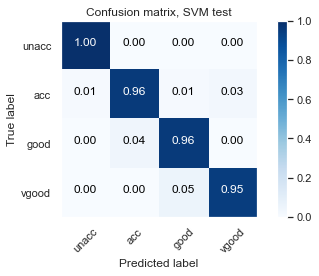

In [59]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test_svm, predictions_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test_svm,predictions_test, output_dict=True)['accuracy']*100))
print ("f1-score = {} %\n".format(classification_report(y_test_svm,predictions_test, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, SVM test', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig19.png", bbox_inches='tight')

In [60]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = {}
f1_scores = {}

for k in range(len(kernels)):
    clf = SVC(kernel=kernels[k], random_state=20, C=20)
    clf.fit(x_svm_train, y_svm_train) 
    predictions_ = clf.predict(x_test)
    mydict_svm = classification_report(y_test_svm,predictions_, output_dict=True)
    accuracies[kernels[k]] = mydict_svm["accuracy"]
    f1_scores[kernels[k]] = mydict_svm['macro avg']['f1-score']

print(accuracies)
print(f1_scores)

maxim = 0
ker = ''
for k in f1_scores.keys():
    if f1_scores[k] > maxim:
        maxim = f1_scores[k]
        ker = k

{'linear': 0.7090558766859345, 'poly': 0.9036608863198459, 'rbf': 0.9865125240847784, 'sigmoid': 0.5741811175337187}
{'linear': 0.2589644120773637, 'poly': 0.8445171743679206, 'rbf': 0.9528796852747736, 'sigmoid': 0.23521209452517244}


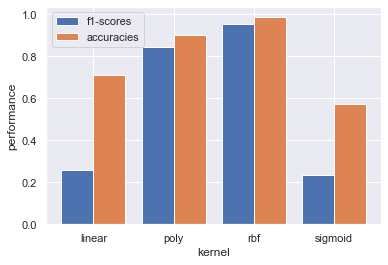

In [61]:
X_axis = np.arange(len(f1_scores.keys()))
  
plt.bar(X_axis - 0.2, f1_scores.values(), 0.4, label = 'f1-scores')
plt.bar(X_axis + 0.2, accuracies.values(), 0.4, label = 'accuracies')
  
plt.xticks(X_axis, f1_scores.keys())
plt.xlabel("kernel")
plt.ylabel("performance")
#plt.title("Number of Students in each group")
plt.legend()
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig19_.png", bbox_inches='tight')

In [62]:
f1_scores2 = {}

for c in np.arange(0.01, 100, 1).tolist():
    clf = SVC(kernel=ker, random_state=20, C=c)
    clf.fit(x_svm_train, y_svm_train) 
    predictions_ = clf.predict(x_test)
    mydict_svm = classification_report(y_test_svm,predictions_, output_dict=True)
    f1_scores2[c] = mydict_svm["macro avg"]["f1-score"]

maxim = 0
C = 0
for c in f1_scores2.keys():
    if f1_scores2[c] > 0:
        maxim = f1_scores2[c]
        C = c
        
print("highest f1 score is {}% ".format(maxim*100) + "with c = {} ".format(C))

highest f1 score is 94.71444919031842% with c = 99.01 


In [63]:
b_v_matrix_svm = np.zeros((10, 3))

for c in np.arange(0.01, 10, 1).tolist():
    print(c)
    i = int(c-0.01)
    clf = SVC(kernel=ker, random_state=20, C=c)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, x_svm_train.to_numpy(), y_svm_train,
                                                                x_test.to_numpy(), y_test_svm, loss='0-1_loss', 
                                                                random_seed=123, num_rounds=50)
    b_v_matrix_svm[i] = [avg_expected_loss, avg_bias, avg_var]

0.01
1.01
2.01
3.01
4.01
5.01
6.01
7.01
8.01
9.01


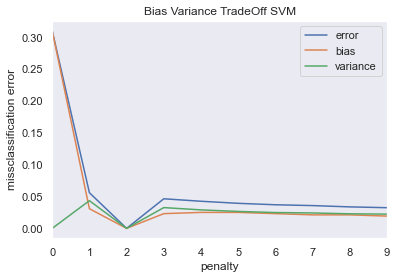

In [64]:
b_v_df_svm = pd.DataFrame(b_v_matrix_svm)
b_v_df_svm.columns = ['error', 'bias', 'variance']
b_v_df_svm.plot(title = "Bias Variance TradeOff SVM")
plt.ylabel('missclassification error')
plt.xlabel('penalty')
plt.grid(False)
sns.set_style("white")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig20.png")

In [65]:
minim = min([i for i in b_v_df_svm.iloc[1:,0] if i > 0])
print(b_v_df_svm[b_v_df_svm['error'] == minim])
b_v_df_svm

      error      bias  variance
9  0.032447  0.019268  0.022351


,error,bias,variance
0,0.310212,0.310212,0.000000
1,0.055954,0.030829,0.043468
2,0.000000,0.000000,0.000000
3,0.046435,0.023121,0.032601
4,0.042543,0.025048,0.029017
5,0.039306,0.025048,0.026590
6,0.037033,0.023121,0.024817
7,0.035761,0.021195,0.024200
8,0.033719,0.021195,0.022852
9,0.032447,0.019268,0.022351


In [66]:
#check

clf2 = SVC(kernel='rbf', random_state=20, C=16)
clf2.fit(x_svm_train, y_svm_train) 
predictions2_ = clf2.predict(x_test)
print ("accuracy = {} %\n".format(classification_report(y_test_svm,predictions2_, output_dict=True)['accuracy']*100))
print(bias_variance_decomp(clf2, x_svm_train.to_numpy(), y_svm_train, x_test.to_numpy(), y_test_svm,
                     loss='0-1_loss', random_seed=123, num_rounds=50))

print("\n")

clf99 = SVC(kernel='rbf', random_state=20, C=99)
clf99.fit(x_svm_train, y_svm_train) 
predictions99_ = clf99.predict(x_test)
print ("accuracy = {} %\n".format(classification_report(y_test_svm,predictions99_, output_dict=True)['accuracy']*100))
print(bias_variance_decomp(clf99, x_svm_train.to_numpy(), y_svm_train, x_test.to_numpy(), y_test_svm,
                     loss='0-1_loss', random_seed=123, num_rounds=50))

accuracy = 98.65125240847784 %

(0.02751445086705203, 0.01348747591522158, 0.02)


accuracy = 98.65125240847784 %

(0.02566473988439306, 0.01348747591522158, 0.019383429672447015)


In [67]:
best_svm = SVC(kernel='rbf', random_state=20, C=16)
best_svm.fit(x_svm_train, y_svm_train) 

best_pred_svm_train = best_svm.predict(x_svm_train)
best_pred_svm_test = best_svm.predict(x_test)

best_acc_svm_train = classification_report(y_svm_train, best_pred_svm_train, output_dict=True)['accuracy']
best_acc_svm_test = classification_report(y_test, best_pred_svm_test, output_dict=True)['accuracy']
f1sc_svm = classification_report(y_test,best_pred_svm_test, output_dict=True)['macro avg']['f1-score']
f1sc_class0_svm = classification_report(y_test,best_pred_svm_test, output_dict=True)['0']['f1-score']
f1sc_class1_svm = classification_report(y_test,best_pred_svm_test, output_dict=True)['1']['f1-score']
f1sc_class2_svm = classification_report(y_test,best_pred_svm_test, output_dict=True)['2']['f1-score']
f1sc_class3_svm = classification_report(y_test,best_pred_svm_test, output_dict=True)['3']['f1-score']

final_matrix_results[2,] = [best_acc_svm_train, best_acc_svm_test,f1sc_svm, f1sc_class2_svm, 
                            f1sc_class0_svm, f1sc_class3_svm, f1sc_class1_svm]

print ("train accuracy = {} %\n".format(best_acc_svm_train*100))
print ("test accuracy = {} %\n".format(best_acc_svm_test*100))
print ("test f1-score = {} %\n".format(f1sc_svm*100))

print(classification_report(y_test,best_pred_svm_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, best_pred_svm_test, labels=[2, 0, 3, 1]))

train accuracy = 100.0 %

test accuracy = 98.65125240847784 %

test f1-score = 95.28796852747736 %

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       118
           1       0.86      0.95      0.90        19
           2       1.00      1.00      1.00       358
           3       0.92      0.96      0.94        24

    accuracy                           0.99       519
   macro avg       0.94      0.97      0.95       519
weighted avg       0.99      0.99      0.99       519

confusion matrix :
[[358   0   0   0]
 [  1 113   1   3]
 [  0   1  23   0]
 [  0   0   1  18]]


accuracy = 98.65125240847784 %

test f1-score = 95.28796852747736 %



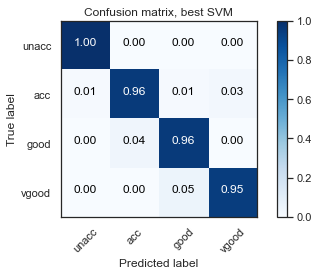

In [68]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, best_pred_svm_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test,best_pred_svm_test, output_dict=True)['accuracy']*100))
print ("test f1-score = {} %\n".format(f1sc_svm*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, best SVM', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig20_.png", bbox_inches='tight')

LOGISTIC REGRESSION

In [69]:
lr_x_train = x_train.copy()
lr_y_train = y_train.copy()
row = lr_y_train.shape[0]
lr_y_train = lr_y_train.values.reshape((row,))
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(C=0.02,penalty='l2', random_state = 10, solver='newton-cg', warm_start=True, fit_intercept=False)
lr_clf.fit(lr_x_train, lr_y_train)

#penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
#C: float, default=1.0 (smaller values specify stronger regularization)
#fit_intercept: bool, default=True (Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.)
#solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ (Algorithm to use in the optimization problem)
#NOTE FOR SOLVER: ‘newton-cg’ - [‘l2’, ‘none’] ,‘lbfgs’ - [‘l2’, ‘none’] ‘liblinear’ - [‘l1’, ‘l2’], ‘sag’ - [‘l2’, ‘none’], ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]
#max_iter: int, default=100 (Maximum number of iterations taken for the solvers to converge.)


LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=True)

In [70]:
predictions = lr_clf.predict(lr_x_train)
accuracy = lr_clf.score(lr_x_train, lr_y_train)
print ("accuracy = {} %\n".format(accuracy*100))
print("f1-score = {}%\n".format(classification_report(lr_y_train,predictions, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(lr_y_train, predictions))
print("confusion matrix :")
print(confusion_matrix(lr_y_train, predictions, labels=[2, 0, 3, 1]))

accuracy = 72.04301075268818 %

f1-score = 28.192157975833265%

              precision    recall  f1-score   support

           0       0.48      0.21      0.29       266
           1       0.00      0.00      0.00        50
           2       0.75      0.96      0.84       852
           3       0.00      0.00      0.00        41

    accuracy                           0.72      1209
   macro avg       0.31      0.29      0.28      1209
weighted avg       0.63      0.72      0.65      1209

confusion matrix :
[[816  36   0   0]
 [211  55   0   0]
 [ 19  22   0   0]
 [ 49   1   0   0]]


accuracy = 72.04301075268818 %

f1-score = 28.192157975833265%



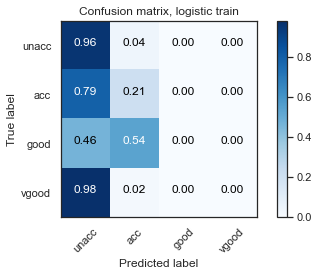

In [71]:
plt.grid(False)

cnf_matrix = confusion_matrix(lr_y_train, predictions,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(accuracy*100))
print("f1-score = {}%\n".format(classification_report(lr_y_train,predictions, output_dict=True)['macro avg']['f1-score']*100))


plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, logistic train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig21.png", bbox_inches='tight')

In [72]:
predictions_test = lr_clf.predict(x_test)
accuracy_test = lr_clf.score(x_test, y_test)
print ("accuracy = {} %\n".format(accuracy_test*100))
print("f1-score = {}%\n".format(classification_report(y_test,predictions_test, output_dict=True)['macro avg']['f1-score']*100))
print (classification_report(y_test, predictions_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, predictions_test, labels=[2, 0, 3, 1]))

accuracy = 68.97880539499036 %

f1-score = 26.808471558959003%

              precision    recall  f1-score   support

           0       0.41      0.19      0.26       118
           1       0.00      0.00      0.00        19
           2       0.72      0.94      0.82       358
           3       0.00      0.00      0.00        24

    accuracy                           0.69       519
   macro avg       0.28      0.28      0.27       519
weighted avg       0.59      0.69      0.62       519

confusion matrix :
[[336  22   0   0]
 [ 96  22   0   0]
 [ 14  10   0   0]
 [ 19   0   0   0]]


accuracy = 68.97880539499036 %

f1-score = 26.808471558959003%



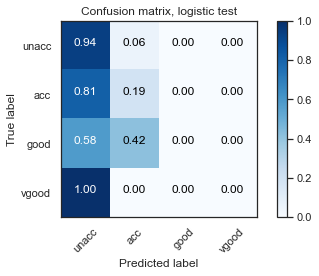

In [73]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predictions_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(accuracy_test*100))
print("f1-score = {}%\n".format(classification_report(y_test,predictions_test, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, logistic test', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig22.png", bbox_inches='tight')

<Figure size 1152x1152 with 0 Axes>

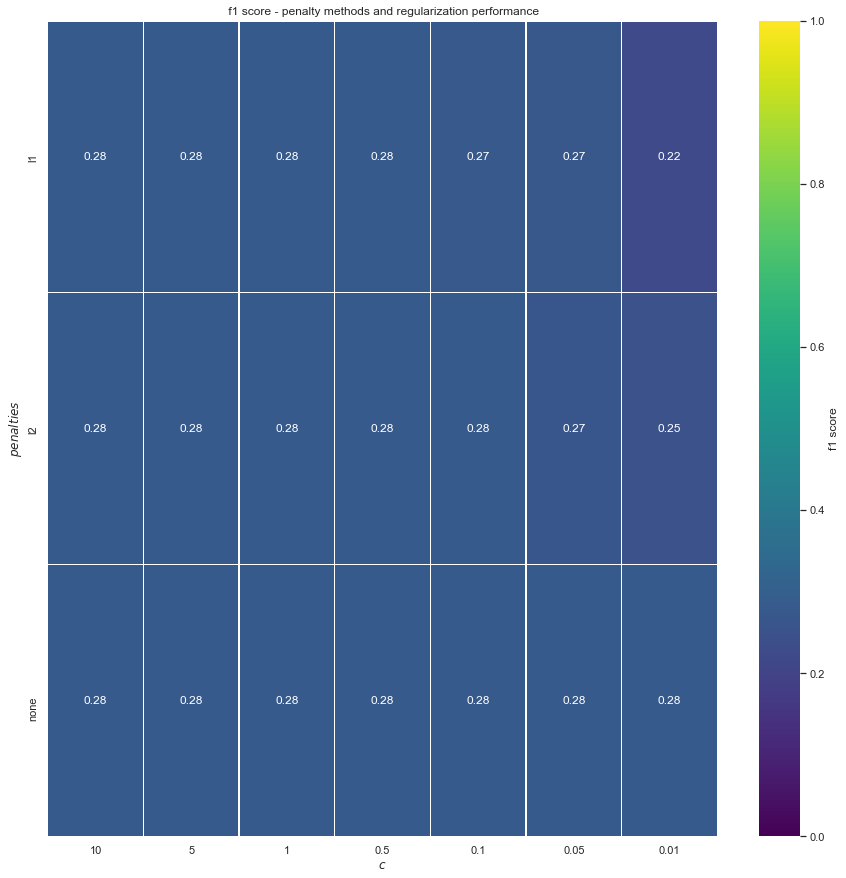

In [74]:
plt.figure(figsize=(16, 16))

penalties =  ['l1', 'l2', 'none']
c = [10, 5, 1, 0.5, 0.1, 0.05, 0.01]
highest_f1_l = 0
pen = ''
c_ = 0

f1_log = np.zeros((len(penalties), len(c)))

for p in range(len(penalties)):
    for n in range(len(c)):
        lr_clf_ = LogisticRegression(C=c[n],penalty=penalties[p], random_state = 10, solver='saga', warm_start=True, fit_intercept=False)
        lr_clf_.fit(lr_x_train, lr_y_train)
        predictions_ = lr_clf_.predict(x_test)
        f1_log[p][n] = classification_report(y_test,predictions_, output_dict=True)['macro avg']['f1-score']
        if f1_log[p][n] > highest_f1_l:
            highest_f1_l = f1_log[p][n]
            c_ = c[n]
            pen = penalties[p]

sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1_log, annot=True, ax=ax, cmap="viridis", xticklabels=c, cbar_kws={'label': 'f1 score'}, yticklabels=penalties, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - penalty methods and regularization performance")
ax.set_ylabel("$penalties$")
ax.set_xlabel("$c$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig23.png", bbox_inches='tight')

In [75]:
print("highest f1 score is {}% ".format(highest_f1_l*100) + "with penalty = {} ".format(pen) + "and penalization = {} ".format(c_))

highest f1 score is 28.078443766887283% with penalty = l1 and penalization = 10 


<Figure size 1152x1152 with 0 Axes>

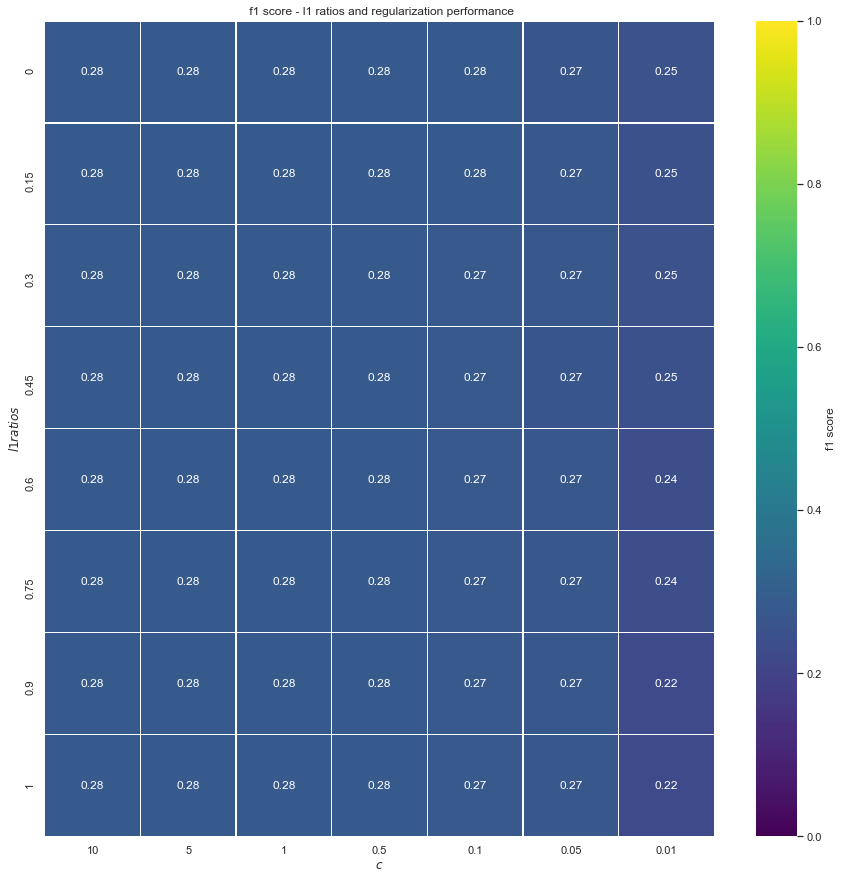

In [76]:
plt.figure(figsize=(16, 16))

l1_ratios = [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1]
c = [10, 5, 1, 0.5, 0.1, 0.05, 0.01]

f1_log = np.zeros((len(l1_ratios), len(c)))

highest_f1_l2 = 0
c2_ = 0
ratio = 0

for lr in range(len(l1_ratios)):
    for n in range(len(c)):
        lr_clf_ = LogisticRegression(C=c[n],penalty='elasticnet',l1_ratio = l1_ratios[lr], random_state = 10, solver='saga', warm_start=True, fit_intercept=False)
        lr_clf_.fit(lr_x_train, lr_y_train)
        predictions_ = lr_clf_.predict(x_test)
        f1_log[lr][n] = classification_report(y_test,predictions_, output_dict=True)['macro avg']['f1-score']
        if f1_log[p][n] > highest_f1_l2:
            highest_f1_l2 = f1_log[lr][n]
            c2_ = c[n]
            ratio = l1_ratios[lr]

sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1_log, annot=True, ax=ax, cmap="viridis", xticklabels=c, cbar_kws={'label': 'f1 score'}, yticklabels=l1_ratios, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - l1 ratios and regularization performance")
ax.set_ylabel("$l1 ratios$")
ax.set_xlabel("$c$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig24.png", bbox_inches='tight')

In [77]:
print("highest f1 score is {}% ".format(highest_f1_l2*100) + "with l1 ratio = {} ".format(ratio) + "and penalization = {} ".format(c2_))

highest f1 score is 28.078443766887283% with l1 ratio = 0.3 and penalization = 10 


<Figure size 1152x1152 with 0 Axes>

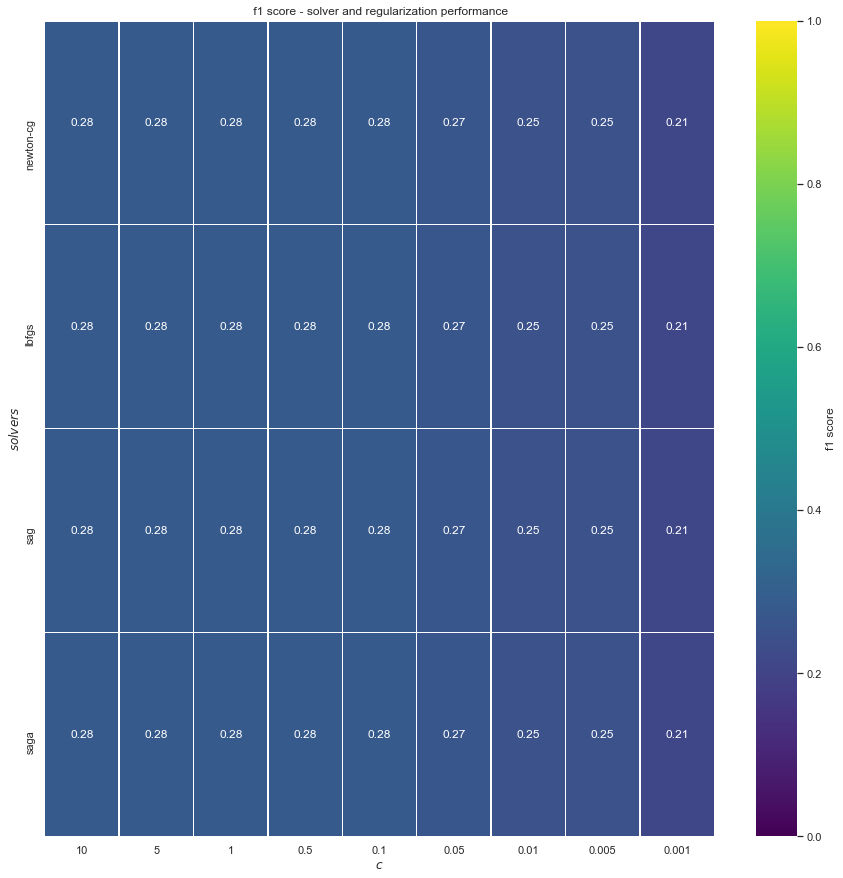

In [78]:
plt.figure(figsize=(16, 16))

#solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ (Algorithm to use in the optimization problem)
#NOTE FOR SOLVER: ‘newton-cg’ - [‘l2’, ‘none’] ,‘lbfgs’ - [‘l2’, ‘none’] ‘liblinear’ - [‘l1’, ‘l2’], ‘sag’ - [‘l2’, ‘none’], ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
c = [10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
highest_f1_l3 = 0
solver = ''
c3_ = 0

f1_log = np.zeros((len(solvers), len(c)))

for s in range(len(solvers)):
    for n in range(len(c)):
        lr_clf_ = LogisticRegression(C=c[n],penalty='l2', random_state = 10, solver=solvers[s], warm_start=True, fit_intercept=False)
        lr_clf_.fit(lr_x_train, lr_y_train)
        predictions_ = lr_clf_.predict(x_test)
        f1_log[s][n] = classification_report(y_test,predictions_, output_dict=True)['macro avg']['f1-score']
        if f1_log[s][n] > highest_f1_l3:
            highest_f1_l3 = f1_log[s][n]
            c_ = c[n]
            solver = solvers[s]

sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1_log, annot=True, ax=ax, cmap="viridis", xticklabels=c, cbar_kws={'label': 'f1 score'}, yticklabels=solvers, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - solver and regularization performance")
ax.set_ylabel("$solvers$")
ax.set_xlabel("$c$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig25.png", bbox_inches='tight')

<Figure size 1152x1152 with 0 Axes>

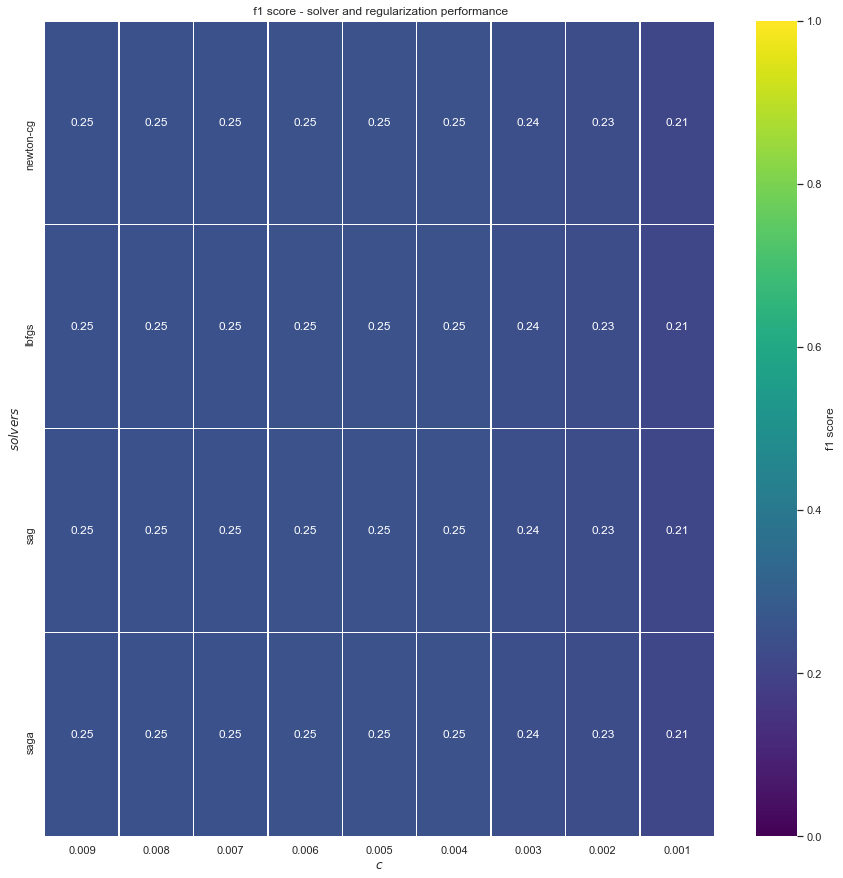

In [79]:
plt.figure(figsize=(16, 16))

#solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ (Algorithm to use in the optimization problem)
#NOTE FOR SOLVER: ‘newton-cg’ - [‘l2’, ‘none’] ,‘lbfgs’ - [‘l2’, ‘none’] ‘liblinear’ - [‘l1’, ‘l2’], ‘sag’ - [‘l2’, ‘none’], ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
c = [0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]
highest_f1_l3 = 0
solver = ''
c3_ = 0

f1_log = np.zeros((len(solvers), len(c)))

for s in range(len(solvers)):
    for n in range(len(c)):
        lr_clf_ = LogisticRegression(C=c[n],penalty='l2', random_state = 10, solver=solvers[s], warm_start=True, fit_intercept=False)
        lr_clf_.fit(lr_x_train, lr_y_train)
        predictions_ = lr_clf_.predict(x_test)
        f1_log[s][n] = classification_report(y_test,predictions_, output_dict=True)['macro avg']['f1-score']
        if f1_log[s][n] > highest_f1_l3:
            highest_f1_l3 = f1_log[s][n]
            c3_ = c[n]
            solver = solvers[s]

sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1_log, annot=True, ax=ax, cmap="viridis", xticklabels=c, cbar_kws={'label': 'f1 score'}, yticklabels=solvers, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - solver and regularization performance")
ax.set_ylabel("$solvers$")
ax.set_xlabel("$c$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig26.png", bbox_inches='tight')

In [80]:
print("highest f1 score is {}% ".format(highest_f1_l3*100) + "with solver = {} ".format(solver) + "and penalization = {} ".format(c3_))

highest f1 score is 25.239350912778907% with solver = newton-cg and penalization = 0.005 


In [81]:
lr_clf_best = LogisticRegression(C=c2_,penalty='elasticnet',l1_ratio = ratio, random_state = 10, solver='saga', warm_start=True, fit_intercept=False)
lr_clf_best.fit(lr_x_train, lr_y_train)

train_pred_lr_best = lr_clf_best.predict(lr_x_train)
test_pred_lr_best = lr_clf_best.predict(x_test)

best_acc_lr_train = classification_report(lr_y_train, train_pred_lr_best, output_dict=True)['accuracy']
best_acc_lr_test = classification_report(y_test, test_pred_lr_best, output_dict=True)['accuracy']
f1sc_lr = classification_report(y_test,test_pred_lr_best, output_dict=True)['macro avg']['f1-score']
f1sc_class0_lr = classification_report(y_test,test_pred_lr_best, output_dict=True)['0']['f1-score']
f1sc_class1_lr = classification_report(y_test,test_pred_lr_best, output_dict=True)['1']['f1-score']
f1sc_class2_lr = classification_report(y_test,test_pred_lr_best, output_dict=True)['2']['f1-score']
f1sc_class3_lr = classification_report(y_test,test_pred_lr_best, output_dict=True)['3']['f1-score']

final_matrix_results[3,] = [best_acc_lr_train, best_acc_lr_test, f1sc_lr, f1sc_class2_lr, 
                            f1sc_class0_lr, f1sc_class3_lr, f1sc_class1_lr]


print ("train accuracy = {} %\n".format(best_acc_lr_train*100))
print ("test accuracy = {} %\n".format(best_acc_lr_test*100))
print ("test f1 score = {} %\n".format(f1sc_lr*100))

print(classification_report(y_test,test_pred_lr_best))
print ("confusion matrix :")
print(confusion_matrix(y_test, test_pred_lr_best, labels=[2, 0, 3, 1]))

train accuracy = 71.21588089330024 %

test accuracy = 68.40077071290945 %

test f1 score = 28.078443766887283 %

              precision    recall  f1-score   support

           0       0.36      0.26      0.30       118
           1       0.00      0.00      0.00        19
           2       0.75      0.91      0.82       358
           3       0.00      0.00      0.00        24

    accuracy                           0.68       519
   macro avg       0.28      0.29      0.28       519
weighted avg       0.60      0.68      0.63       519

confusion matrix :
[[324  34   0   0]
 [ 87  31   0   0]
 [  7  17   0   0]
 [ 15   4   0   0]]


accuracy = 68.40077071290945 %

test f1 score = 28.078443766887283 %



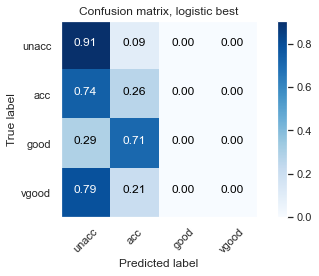

In [82]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, test_pred_lr_best,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test,test_pred_lr_best, output_dict=True)['accuracy']*100))
print ("test f1 score = {} %\n".format(f1sc_lr*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, logistic best', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig27.png", bbox_inches='tight')

BAGGING

In [83]:
bagging_x_train = x_train.copy()
bagging_y_train = y_train.copy()
row = bagging_y_train.shape[0]
bagging_y_train = bagging_y_train.values.reshape((row,))
bagging_clf = BaggingClassifier(random_state=None, bootstrap=True, max_features=6)
bagging_clf.fit(bagging_x_train, bagging_y_train)

#n_estimators: int, default=10 (number of base estimators in the ensemble.)
#max_samples: int or float, default=1.0 (number of samples to draw from X to train each base estimator)
#max_features: int or float, default=1.0 (number of features to draw from X)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=6, max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [84]:
predictions = bagging_clf.predict(bagging_x_train)
accuracy = bagging_clf.score(bagging_x_train, bagging_y_train)
print ("Accuracy = {} %\n".format(accuracy*100))
print ("f1 score = {} %\n".format(classification_report(bagging_y_train,predictions, output_dict=True)['macro avg']['f1-score']*100))
print (classification_report(bagging_y_train, predictions))
print ("confusion matrix :")
print(confusion_matrix(bagging_y_train, predictions, labels=[2, 0, 3, 1]))

Accuracy = 99.9172870140612 %

f1 score = 99.93825626411738 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       852
           3       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

confusion matrix :
[[852   0   0   0]
 [  1 265   0   0]
 [  0   0  41   0]
 [  0   0   0  50]]


Accuracy = 99.9172870140612 %

f1 score = 99.93825626411738 %



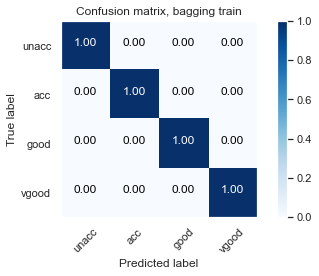

In [85]:
plt.grid(False)

cnf_matrix = confusion_matrix(bagging_y_train, predictions,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy*100))
print ("f1 score = {} %\n".format(classification_report(bagging_y_train,predictions, output_dict=True)['macro avg']['f1-score']*100))


plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, bagging train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig28.png", bbox_inches='tight')

In [86]:
predictions_test = bagging_clf.predict(x_test)
accuracy_test = bagging_clf.score(x_test, y_test)
print ("Accuracy = {} %\n".format(accuracy_test*100))
print ("f1 score = {} %\n".format(classification_report(y_test,predictions_test, output_dict=True)['macro avg']['f1-score']*100))
print (classification_report(y_test, predictions_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, predictions_test, labels=[2, 0, 3, 1]))

Accuracy = 96.72447013487476 %

f1 score = 91.34950712701301 %

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       118
           1       0.69      0.95      0.80        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.91      0.93      0.91       519
weighted avg       0.97      0.97      0.97       519

confusion matrix :
[[354   4   0   0]
 [  1 109   0   8]
 [  0   3  21   0]
 [  0   1   0  18]]


Accuracy = 96.72447013487476 %

f1 score = 91.34950712701301 %



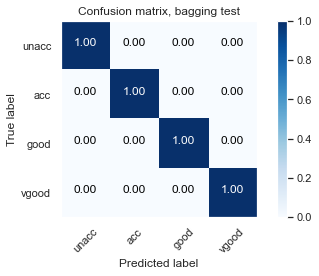

In [87]:
plt.grid(False)

cnf_matrix = confusion_matrix(bagging_y_train, predictions,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy_test*100))
print ("f1 score = {} %\n".format(classification_report(y_test,predictions_test, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, bagging test', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig29.png", bbox_inches='tight')

In [88]:
n_estim = [1, 5, 10, 50, 100, 500, 1000]
f1_e = {}
for e in range(len(n_estim)):
    bagging_clf_ = BaggingClassifier(random_state=None, bootstrap=True, max_features=6, n_estimators = n_estim[e])
    bagging_clf_.fit(bagging_x_train, bagging_y_train)
    predictions_ = bagging_clf_.predict(x_test)
    f1_e[n_estim[e]] = classification_report(y_test,predictions_, output_dict=True)['macro avg']['f1-score']

for a in f1_e.keys():
    print ("f1 score with {} ".format(a) + "esitmators is = {} %\n".format(f1_e[a]*100))

f1 score with 1 esitmators is = 86.85898498245201 %

f1 score with 5 esitmators is = 88.58088690021462 %

f1 score with 10 esitmators is = 90.3410756291285 %

f1 score with 50 esitmators is = 89.70964727359659 %

f1 score with 100 esitmators is = 91.44902597912147 %

f1 score with 500 esitmators is = 91.4610951754917 %

f1 score with 1000 esitmators is = 91.59563549129697 %



In [89]:
f1scores_e = {}
for e in np.arange(200, 500, 50).tolist():
    bagging_clf_ = BaggingClassifier(random_state=None, bootstrap=True, max_features=6, n_estimators = e)
    bagging_clf_.fit(bagging_x_train, bagging_y_train)
    predictions_ = bagging_clf_.predict(x_test)
    f1scores_e[e] = classification_report(y_test,predictions_, output_dict=True)['macro avg']['f1-score']
    
highest_f1_b = 0
es = 0
for a in f1scores_e.keys():
     if f1scores_e[a] > highest_f1_b:
            highest_f1_b = f1scores_e[a]
            es = a
print ("Highest f1 score is {}% ".format(highest_f1_b*100) + "with {} ".format(a) + "weak learners")

Highest f1 score is 91.59563549129697% with 450 weak learners


In [90]:
drawn_features = [1, 2, 3, 4, 5, 6]
f1scores_f = {}
for df in range(len(drawn_features)):
    bagging_clf_ = BaggingClassifier(random_state=None, bootstrap=True, max_features=drawn_features[df], n_estimators = es)
    bagging_clf_.fit(bagging_x_train, bagging_y_train)
    predictions_ = bagging_clf_.predict(x_test)
    f1scores_f[drawn_features[df]] = classification_report(y_test,predictions_, output_dict=True)['macro avg']['f1-score']

for f in f1scores_f.keys():
    print ("f1 score with {} ".format(f) + "drawn features is = {} %\n".format(f1scores_f[f]*100))

f1 score with 1 drawn features is = 20.41049030786773 %

f1 score with 2 drawn features is = 20.41049030786773 %

f1 score with 3 drawn features is = 23.771027707096408 %

f1 score with 4 drawn features is = 47.6010101010101 %

f1 score with 5 drawn features is = 80.77460340005143 %

f1 score with 6 drawn features is = 90.7082899477504 %



In [91]:
b_v_matrix_bag1 = np.zeros((20, 3))
print(len(np.arange(10, 500, 25).tolist()))
count = 0

for e in np.arange(10, 500, 25).tolist():
    print(count)
    clf = BaggingClassifier(random_state=None, bootstrap=True, max_features=6, n_estimators = e)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, bagging_x_train.to_numpy(), bagging_y_train,
                                                                x_test.to_numpy(), y_test.to_numpy(), loss='0-1_loss', 
                                                                random_seed=123, num_rounds=50)
    b_v_matrix_bag1[count] = [avg_expected_loss, avg_bias, avg_var]
    count += 1

20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


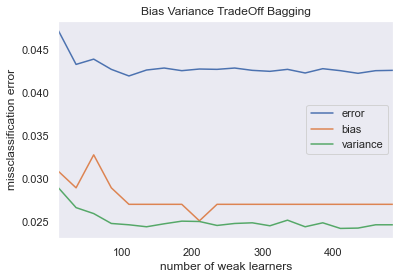

In [92]:
#The behavior of the bias is unexpected. Due to a lack of time, this will 
#not be included in the porject report

weaklearners = np.arange(10, 500, 25).tolist()
#print(weaklearners)
b_v_matrix_bag = pd.DataFrame(b_v_matrix_bag1)
b_v_matrix_bag.columns = ['error', 'bias', 'variance']
b_v_matrix_bag['weak learners'] = np.arange(10, 500, 25).tolist()
b_v_matrix_bag=b_v_matrix_bag.set_index('weak learners')
#print(b_v_matrix_bag)
b_v_matrix_bag.plot(title = "Bias Variance TradeOff Bagging")
#plt.xticks(label=weaklearners)
plt.ylabel('missclassification error')
plt.xlabel('number of weak learners')

plt.grid(False)
sns.set_style("white")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig30.png")

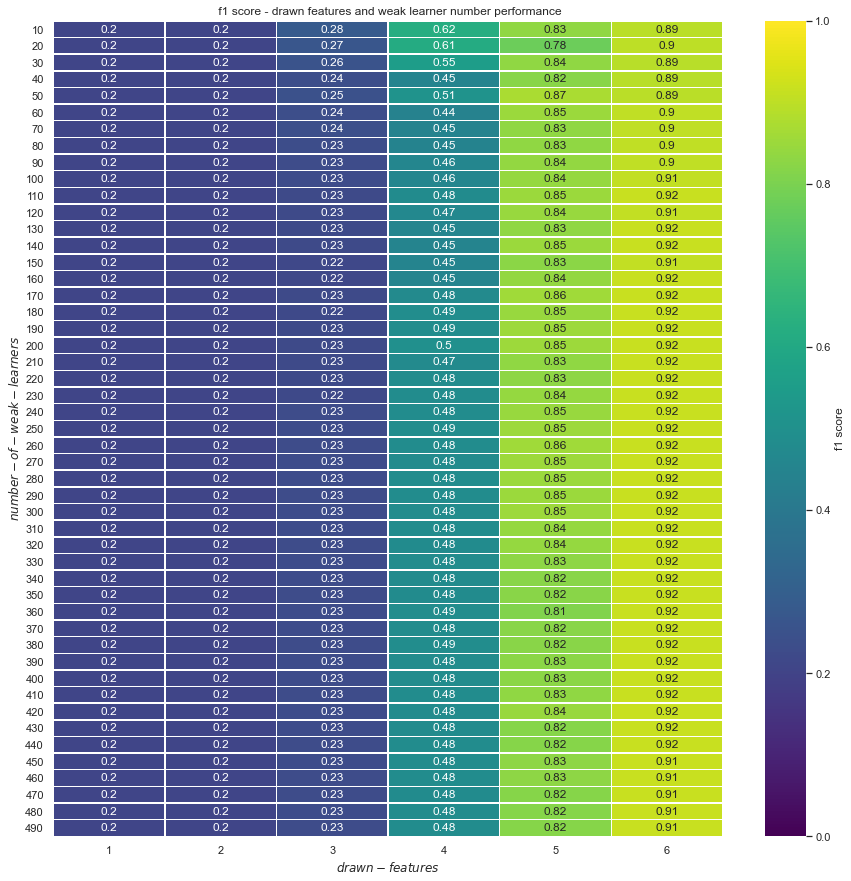

In [93]:
n_estim = np.arange(10, 500, 10).tolist()
drawn_features = [1, 2, 3, 4, 5, 6]
f1_bagging = np.zeros((len(n_estim), len(drawn_features)))

highest_f1_bag = 0
est = 0
dr_f = 0

for e in np.arange(10, 500, 10).tolist():
    index = int(e/10)-1
    for df in range(len(drawn_features)):
        bagging_clf_ = BaggingClassifier(random_state=123, bootstrap=True, max_features=drawn_features[df], n_estimators = e)
        bagging_clf_.fit(bagging_x_train, bagging_y_train)
        predictions_ = bagging_clf_.predict(x_test)
        f1_bagging[index][df] = classification_report(y_test,predictions_, output_dict=True)['macro avg']['f1-score']
        if f1_bagging[index][df] > highest_f1_bag:
            highest_f1_bag = f1_bagging[index][df]
            est = e
            dr_f = drawn_features[df]

        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1_bagging, annot=True, ax=ax, cmap="viridis", xticklabels=drawn_features, cbar_kws={'label': 'f1 score'}, yticklabels=n_estim, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - drawn features and weak learner number performance")
ax.set_ylabel("$number - of - weak - learners$")
ax.set_xlabel("$drawn - features$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig31.png", bbox_inches='tight')      

#for df in range(len(drawn_features)):
 #   for e in range(len(n_estim)):        
  #      print ("Accuracy with {}" .format(df) + " drawn features and {} ".format(n_estim[e]) + "esitmators ".format(drawn_features[df]) + "is = {} %\n".format(acc_matrix[e][df]*100))

In [94]:
print("highest f1 score is {}% ".format(highest_f1_bag*100) + "with number of weak learners = {} ".format(est) + "and drwan features = {} ".format(dr_f))

highest f1 score is 91.59563549129697% with number of weak learners = 110 and drwan features = 6 


In [95]:
bagging_best = BaggingClassifier(random_state=123, bootstrap=True, max_features=dr_f, n_estimators = est)
bagging_best.fit(bagging_x_train, bagging_y_train)

train_pred_bag_best = bagging_best.predict(bagging_x_train)
test_pred_bag_best = bagging_best.predict(x_test)

best_acc_bag_train = classification_report(bagging_y_train, train_pred_bag_best, output_dict=True)['accuracy']
best_acc_bag_test = classification_report(y_test, test_pred_bag_best, output_dict=True)['accuracy']
f1sc_bag = classification_report(y_test,test_pred_bag_best, output_dict=True)['macro avg']['f1-score']
f1sc_class0_bag = classification_report(y_test,test_pred_bag_best, output_dict=True)['0']['f1-score']
f1sc_class1_bag = classification_report(y_test,test_pred_bag_best, output_dict=True)['1']['f1-score']
f1sc_class2_bag = classification_report(y_test,test_pred_bag_best, output_dict=True)['2']['f1-score']
f1sc_class3_bag = classification_report(y_test,test_pred_bag_best, output_dict=True)['3']['f1-score']

final_matrix_results[4,] = [best_acc_bag_train, best_acc_bag_test, f1sc_bag, f1sc_class2_bag, 
                            f1sc_class0_bag, f1sc_class3_bag, f1sc_class1_bag]

print ("train accuracy = {} %\n".format(best_acc_bag_train*100))
print ("test accuracy = {} %\n".format(best_acc_bag_test*100))
print ("test f1 score = {} %\n".format(f1sc_bag*100))

print(classification_report(y_test,test_pred_bag_best))
print ("confusion matrix :")
print(confusion_matrix(y_test, test_pred_bag_best, labels=[2, 0, 3, 1]))

train accuracy = 100.0 %

test accuracy = 97.30250481695568 %

test f1 score = 91.59563549129697 %

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       118
           1       0.77      0.89      0.83        19
           2       1.00      0.99      1.00       358
           3       0.91      0.88      0.89        24

    accuracy                           0.97       519
   macro avg       0.91      0.93      0.92       519
weighted avg       0.97      0.97      0.97       519

confusion matrix :
[[355   3   0   0]
 [  0 112   1   5]
 [  0   3  21   0]
 [  0   1   1  17]]


accuracy = 97.30250481695568 %

test f1 score = 91.59563549129697 %



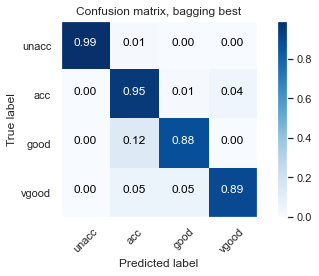

In [96]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, test_pred_bag_best,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test, test_pred_bag_best, output_dict=True)['accuracy']*100))
print ("test f1 score = {} %\n".format(f1sc_bag*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, bagging best', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig32.png", bbox_inches='tight')

ADABOOST

In [97]:
import copy
x_adaboost_train=x_train.copy()
y_adaboost_train=y_train.copy()
row = y_adaboost_train.shape[0]
y_adaboost_train=y_adaboost_train.values.reshape((row,))
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=750,random_state=1,learning_rate=0.25,algorithm='SAMME')
clf.fit(x_adaboost_train, y_adaboost_train)

#n_estimators: int, default=50 (The maximum number of estimators at which boosting is terminated)
#learning_rate: float, default=1.0 (Weight applied to each classifier at each boosting iteration)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.25,
                   n_estimators=750, random_state=1)

In [98]:
predictions = clf.predict(x_adaboost_train)
accuracy=clf.score(x_adaboost_train,y_adaboost_train)
print ("Accuracy = {}%\n".format(accuracy*100))
print("f1 score = {}%\n".format(classification_report(y_adaboost_train,predictions, output_dict=True)['macro avg']['f1-score']))
print(classification_report(y_adaboost_train,predictions))
print ("confusion matrix :")
print(confusion_matrix(y_adaboost_train,predictions, labels=[2, 0, 3, 1]))

Accuracy = 84.69809760132341%

f1 score = 0.5606779086145115%

              precision    recall  f1-score   support

           0       0.63      0.80      0.70       266
           1       0.00      0.00      0.00        50
           2       0.94      0.93      0.93       852
           3       0.80      0.49      0.61        41

    accuracy                           0.85      1209
   macro avg       0.59      0.55      0.56      1209
weighted avg       0.83      0.85      0.83      1209

confusion matrix :
[[790  62   0   0]
 [ 52 214   0   0]
 [  0  21  20   0]
 [  0  45   5   0]]


Accuracy = 84.69809760132341%

f1 score = 0.5606779086145115%



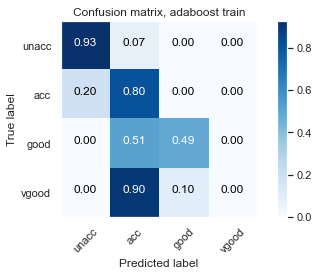

In [99]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_adaboost_train, predictions,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {}%\n".format(accuracy*100))
print("f1 score = {}%\n".format(classification_report(y_adaboost_train,predictions, output_dict=True)['macro avg']['f1-score']))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, adaboost train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig33.png", bbox_inches='tight')

In [100]:
predictions_te = clf.predict(x_test)
accuracy_te=clf.score(x_test,y_test)
print ("Accuracy={}%\n".format(accuracy_te*100))
print("f1 score = {}%\n".format(classification_report(y_test,predictions_te, output_dict=True)['macro avg']['f1-score']))
print(classification_report(y_test,predictions_te))
print ("confusion matrix :")
print(confusion_matrix(y_test,predictions_te, labels=[2, 0, 3, 1]))

Accuracy=84.77842003853564%

f1 score = 0.5628739316239317%

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       118
           1       0.00      0.00      0.00        19
           2       0.93      0.94      0.94       358
           3       0.80      0.50      0.62        24

    accuracy                           0.85       519
   macro avg       0.59      0.55      0.56       519
weighted avg       0.82      0.85      0.83       519

confusion matrix :
[[337  21   0   0]
 [ 25  91   2   0]
 [  0  12  12   0]
 [  0  18   1   0]]


Accuracy = 84.77842003853564%

f1 score = 0.5628739316239317%



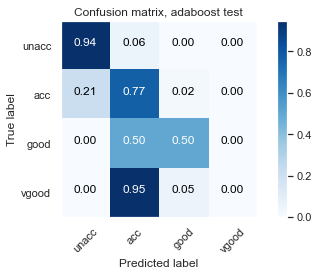

In [101]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predictions_te,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {}%\n".format(accuracy_te*100))
print("f1 score = {}%\n".format(classification_report(y_test,predictions_te, output_dict=True)['macro avg']['f1-score']))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, adaboost test', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig34.png", bbox_inches='tight')

<Figure size 1152x2304 with 0 Axes>

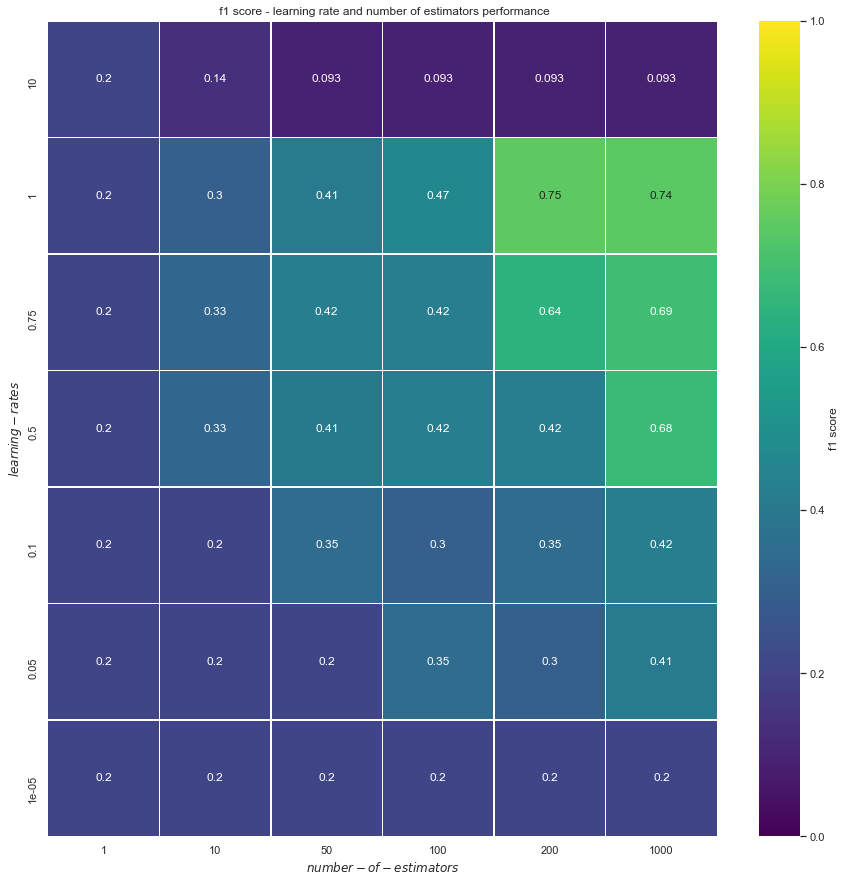

In [102]:
plt.figure(figsize=(16, 32))

learning_rates = [10, 1, 0.75, 0.5, 0.1, 0.05, 0.00001]
n_estim = [1, 10, 50, 100, 200, 1000]

f1_ab = np.zeros((len(learning_rates), len(n_estim)))

for lr in range(len(learning_rates)):
    for e in range(len(n_estim)):
        ab_clf_ = AdaBoostClassifier(n_estimators=n_estim[e], random_state=1,learning_rate=learning_rates[lr],algorithm='SAMME')        
        ab_clf_.fit(x_adaboost_train, y_adaboost_train)
        predictions_ = ab_clf_.predict(x_test)
        mydict_ab = classification_report(y_test,predictions_, output_dict=True)
        f1_ab[lr][e] = mydict_ab['macro avg']['f1-score']
        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1_ab, annot=True, ax=ax, cmap="viridis", xticklabels=n_estim, cbar_kws={'label': 'f1 score'}, yticklabels=learning_rates, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - learning rate and number of estimators performance")
ax.set_ylabel("$learning - rates$")
ax.set_xlabel("$number - of - estimators$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig35.png", bbox_inches='tight')

In [103]:
for lr in range(len(learning_rates)):
    for e in range(len(n_estim)):    
        print ("f1 score with learning rate equal to {} ".format(learning_rates[lr]) + "and {} ".format(n_estim[e]) + "estimators is = {} %\n".format(f1_ab[lr][e]*100))

f1 score with learning rate equal to 10 and 1 estimators is = 20.41049030786773 %

f1 score with learning rate equal to 10 and 10 estimators is = 13.72749226106546 %

f1 score with learning rate equal to 10 and 50 estimators is = 9.262166405023548 %

f1 score with learning rate equal to 10 and 100 estimators is = 9.262166405023548 %

f1 score with learning rate equal to 10 and 200 estimators is = 9.262166405023548 %

f1 score with learning rate equal to 10 and 1000 estimators is = 9.262166405023548 %

f1 score with learning rate equal to 1 and 1 estimators is = 20.41049030786773 %

f1 score with learning rate equal to 1 and 10 estimators is = 29.89702517162472 %

f1 score with learning rate equal to 1 and 50 estimators is = 40.64326576296481 %

f1 score with learning rate equal to 1 and 100 estimators is = 46.62025549122323 %

f1 score with learning rate equal to 1 and 200 estimators is = 75.2728024567272 %

f1 score with learning rate equal to 1 and 1000 estimators is = 74.43745702789

<Figure size 1152x2304 with 0 Axes>

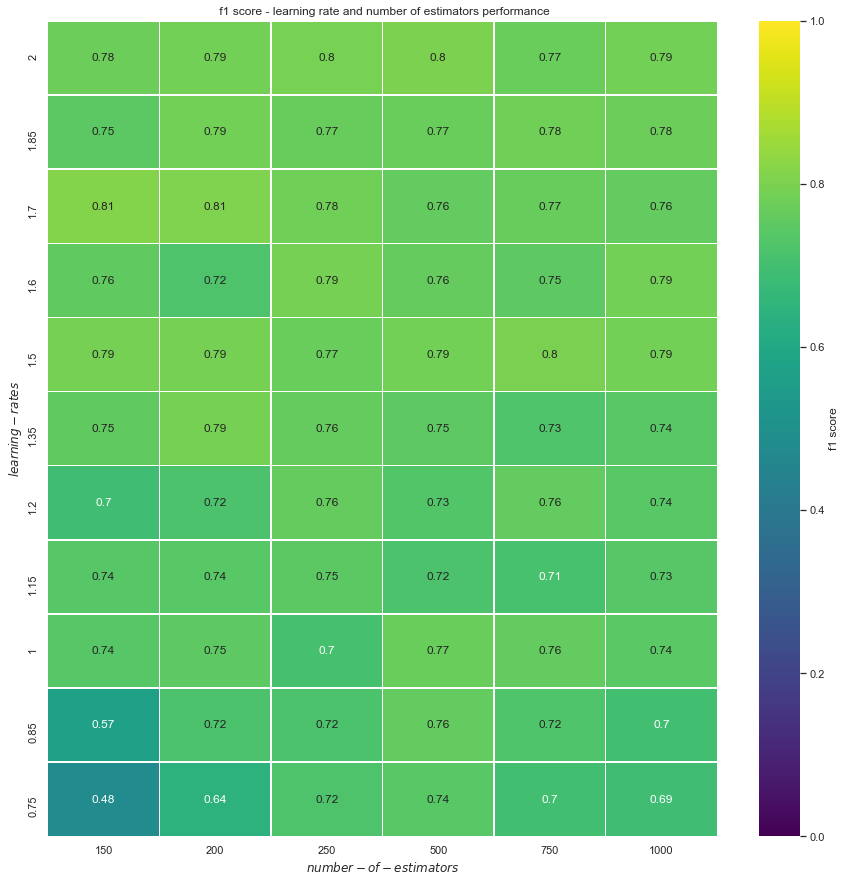

In [104]:
plt.figure(figsize=(16, 32))

learning_rates = [2, 1.85, 1.7, 1.6, 1.5, 1.35, 1.2, 1.15, 1, 0.85, 0.75]
n_estim = [150, 200, 250, 500, 750, 1000]

f1s_ab = np.zeros((len(learning_rates), len(n_estim)))

highest_f1_ab = 0
best_lr = 0
best_est = 0

for lr in range(len(learning_rates)):
    for e in range(len(n_estim)):
        ab_clf_ = AdaBoostClassifier(n_estimators=n_estim[e], random_state=1,learning_rate=learning_rates[lr],algorithm='SAMME')        
        ab_clf_.fit(x_adaboost_train, y_adaboost_train)
        predictions_ = ab_clf_.predict(x_test)
        mydict_ab = classification_report(y_test, predictions_, output_dict=True)
        f1s_ab[lr][e] = mydict_ab['macro avg']['f1-score']
        if f1s_ab[lr][e] > highest_f1_ab:
            highest_f1_ab = f1s_ab[lr][e]
            best_lr = learning_rates[lr]
            best_est = n_estim[e]
        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1s_ab, annot=True, ax=ax, cmap="viridis", xticklabels=n_estim, cbar_kws={'label': 'f1 score'}, yticklabels=learning_rates, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - learning rate and number of estimators performance")
ax.set_ylabel("$learning - rates$")
ax.set_xlabel("$number - of - estimators$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig36.png", bbox_inches='tight')

In [105]:
print("highest f1 score is {}% ".format(highest_f1_ab*100)+"with learning rate = {} ".format(best_lr)+"and number of weak learners = {}".format(best_est))

highest f1 score is 81.44764580975429% with learning rate = 1.7 and number of weak learners = 150


In [106]:
ada_best = AdaBoostClassifier(n_estimators=best_est, random_state=1,learning_rate=best_lr,algorithm='SAMME')  
ada_best.fit(x_adaboost_train, y_adaboost_train)

train_pred_ab_best = ada_best.predict(x_adaboost_train)
test_pred_ab_best = ada_best.predict(x_test)

best_acc_ab_train = classification_report(y_adaboost_train, train_pred_ab_best, output_dict=True)['accuracy']
best_acc_ab_test = classification_report(y_test, test_pred_ab_best, output_dict=True)['accuracy']
f1sc_ab = classification_report(y_test,test_pred_ab_best, output_dict=True)['macro avg']['f1-score']
f1sc_class0_ab = classification_report(y_test,test_pred_ab_best, output_dict=True)['0']['f1-score']
f1sc_class1_ab = classification_report(y_test,test_pred_ab_best, output_dict=True)['1']['f1-score']
f1sc_class2_ab = classification_report(y_test,test_pred_ab_best, output_dict=True)['2']['f1-score']
f1sc_class3_ab = classification_report(y_test,test_pred_ab_best, output_dict=True)['3']['f1-score']

final_matrix_results[5,] = [best_acc_ab_train, best_acc_ab_test, f1sc_ab, f1sc_class2_ab, 
                            f1sc_class0_ab, f1sc_class3_ab, f1sc_class1_ab]

print ("train accuracy = {} %\n".format(best_acc_ab_train*100))
print ("test accuracy = {} %\n".format(best_acc_ab_test*100))
print ("test f1 score = {} %\n".format(f1sc_ab*100))

print(classification_report(y_test,test_pred_ab_best))
print ("confusion matrix :")
print(confusion_matrix(y_test, test_pred_ab_best, labels=[2, 0, 3, 1]))

train accuracy = 86.68320926385442 %

test accuracy = 88.82466281310212 %

test f1 score = 81.44764580975429 %

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       118
           1       0.61      0.74      0.67        19
           2       0.93      0.96      0.94       358
           3       0.88      0.92      0.90        24

    accuracy                           0.89       519
   macro avg       0.81      0.83      0.81       519
weighted avg       0.89      0.89      0.89       519

confusion matrix :
[[342  16   0   0]
 [ 26  83   1   8]
 [  0   1  22   1]
 [  0   3   2  14]]


accuracy = 88.82466281310212 %

test f1 score = 81.44764580975429 %



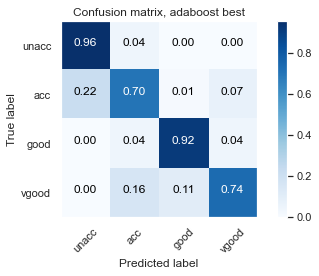

In [107]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, test_pred_ab_best,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test, test_pred_ab_best, output_dict=True)['accuracy']*100))
print ("test f1 score = {} %\n".format(f1sc_ab*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, adaboost best', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig37.png", bbox_inches='tight')

GRADIENT BOOSTING

In [108]:
gb_x_train = x_train.copy()
gb_y_train = y_train.copy()
row = gb_y_train.shape[0]
gb_y_train = gb_y_train.values.reshape((row,))
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(learning_rate=0.2, max_depth = 3, max_leaf_nodes=5)
gb_clf.fit(gb_x_train, gb_y_train)

#loss: {‘deviance’, ‘exponential’}, default=’deviance’ (loss function to be optimized, For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm)
#learning_rate: float, default=0.1 (Learning rate shrinks the contribution of each tree by learning_rate)
#n_estimators: int, default=100 (robust to over-fitting so a large number usually results in better performance)
#subsample: float, default=1.0 (fraction of samples to be used for fitting the individual base learners)
#criterion: {‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’ (function to measure the quality of a split)
#min_samples_split: int or float, default=2 (The minimum number of samples required to split an internal node)
#min_samples_leaf: int or float, default=1 (The minimum number of samples required to be at a leaf node)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=5,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [109]:
predictions = gb_clf.predict(gb_x_train)
accuracy = gb_clf.score(gb_x_train, gb_y_train)
print ("Accuracy = {}% \n".format(accuracy*100))
print ("f1 score = {}% \n".format(classification_report(gb_y_train, predictions, output_dict=True)['macro avg']['f1-score']*100))
print (classification_report(gb_y_train, predictions))
print ("confusion matrix :")
print(confusion_matrix(gb_y_train, predictions, labels=[2, 0, 3, 1]))

Accuracy = 99.83457402812242% 

f1 score = 99.41546429892712% 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       266
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00       852
           3       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       0.99      1.00      0.99      1209
weighted avg       1.00      1.00      1.00      1209

confusion matrix :
[[852   0   0   0]
 [  0 264   0   2]
 [  0   0  41   0]
 [  0   0   0  50]]


Accuracy = 99.83457402812242 %

f1 score = 99.41546429892712% 



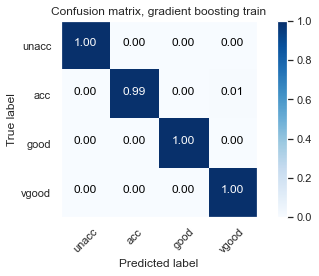

In [110]:
plt.grid(False)

cnf_matrix = confusion_matrix(gb_y_train, predictions,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy*100))
print ("f1 score = {}% \n".format(classification_report(gb_y_train, predictions, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, gradient boosting train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig38.png", bbox_inches='tight')

In [111]:
predictions_test = gb_clf.predict(x_test)
accuracy_test = gb_clf.score(x_test, y_test)
print ("Accuracy = {} % \n".format(accuracy_test*100))
print ("f1 score = {}% \n".format(classification_report(y_test, predictions_test, output_dict=True)['macro avg']['f1-score']*100))
print (classification_report(y_test, predictions_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, predictions_test, labels=[2, 0, 3, 1]))

Accuracy = 98.45857418111753 % 

f1 score = 94.14038342609771% 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       118
           1       0.78      0.95      0.86        19
           2       1.00      1.00      1.00       358
           3       0.92      0.96      0.94        24

    accuracy                           0.98       519
   macro avg       0.92      0.96      0.94       519
weighted avg       0.99      0.98      0.99       519

confusion matrix :
[[358   0   0   0]
 [  0 112   1   5]
 [  0   1  23   0]
 [  0   0   1  18]]


Accuracy = 98.45857418111753 %

f1 score = 94.14038342609771% 



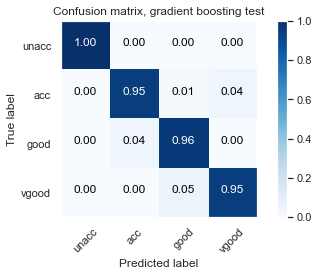

In [112]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predictions_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy_test*100))
print ("f1 score = {}% \n".format(classification_report(y_test, predictions_test, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, gradient boosting test', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig39.png", bbox_inches='tight')

<Figure size 1152x2304 with 0 Axes>

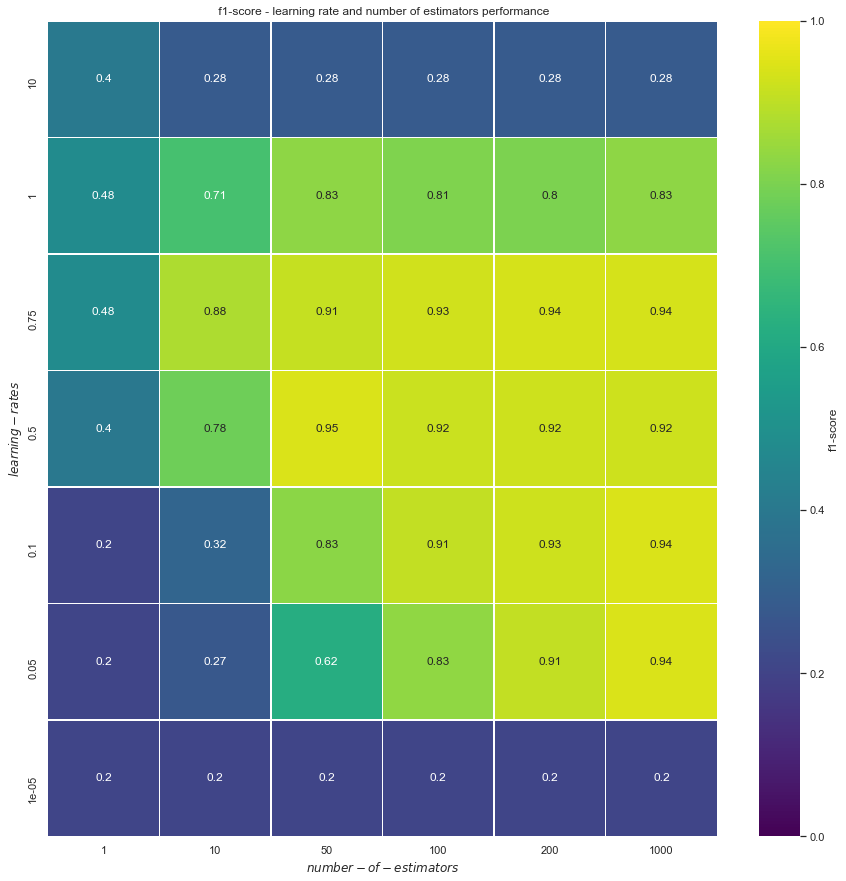

In [113]:
plt.figure(figsize=(16, 32))

learning_rates = [10, 1, 0.75, 0.5, 0.1, 0.05, 0.00001]
n_estim = [1, 10, 50, 100, 200, 1000]

f1_gb = np.zeros((len(learning_rates), len(n_estim)))

for lr in range(len(learning_rates)):
    for e in range(len(n_estim)):
        gb_clf_ = GradientBoostingClassifier(learning_rate=learning_rates[lr], max_depth = 3, max_leaf_nodes=5, n_estimators = n_estim[e])
        gb_clf_.fit(gb_x_train, gb_y_train)
        predictions_ = gb_clf_.predict(x_test)
        mydict_gb = classification_report(y_test, predictions_, output_dict=True)
        f1_gb[lr][e] = mydict_gb["macro avg"]['f1-score']
        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1_gb, annot=True, ax=ax, cmap="viridis", xticklabels=n_estim, cbar_kws={'label': 'f1-score'}, yticklabels=learning_rates, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1-score - learning rate and number of estimators performance")
ax.set_ylabel("$learning - rates$")
ax.set_xlabel("$number - of - estimators$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig40.png", bbox_inches='tight')

In [114]:
for lr in range(len(learning_rates)):
    for e in range(len(n_estim)):    
        print ("f1 score with learning rate equal to {} ".format(learning_rates[lr]) + "and {} ".format(n_estim[e]) + "estimators is = {} %\n".format(f1_gb[lr][e]*100))

f1 score with learning rate equal to 10 and 1 estimators is = 40.3361920917309 %

f1 score with learning rate equal to 10 and 10 estimators is = 28.148312700944278 %

f1 score with learning rate equal to 10 and 50 estimators is = 28.148312700944278 %

f1 score with learning rate equal to 10 and 100 estimators is = 28.148312700944278 %

f1 score with learning rate equal to 10 and 200 estimators is = 28.148312700944278 %

f1 score with learning rate equal to 10 and 1000 estimators is = 28.148312700944278 %

f1 score with learning rate equal to 1 and 1 estimators is = 48.03093280322882 %

f1 score with learning rate equal to 1 and 10 estimators is = 70.55714831804282 %

f1 score with learning rate equal to 1 and 50 estimators is = 82.8663577951532 %

f1 score with learning rate equal to 1 and 100 estimators is = 80.50634167083726 %

f1 score with learning rate equal to 1 and 200 estimators is = 80.46727966677982 %

f1 score with learning rate equal to 1 and 1000 estimators is = 82.8915645

<Figure size 1152x2304 with 0 Axes>

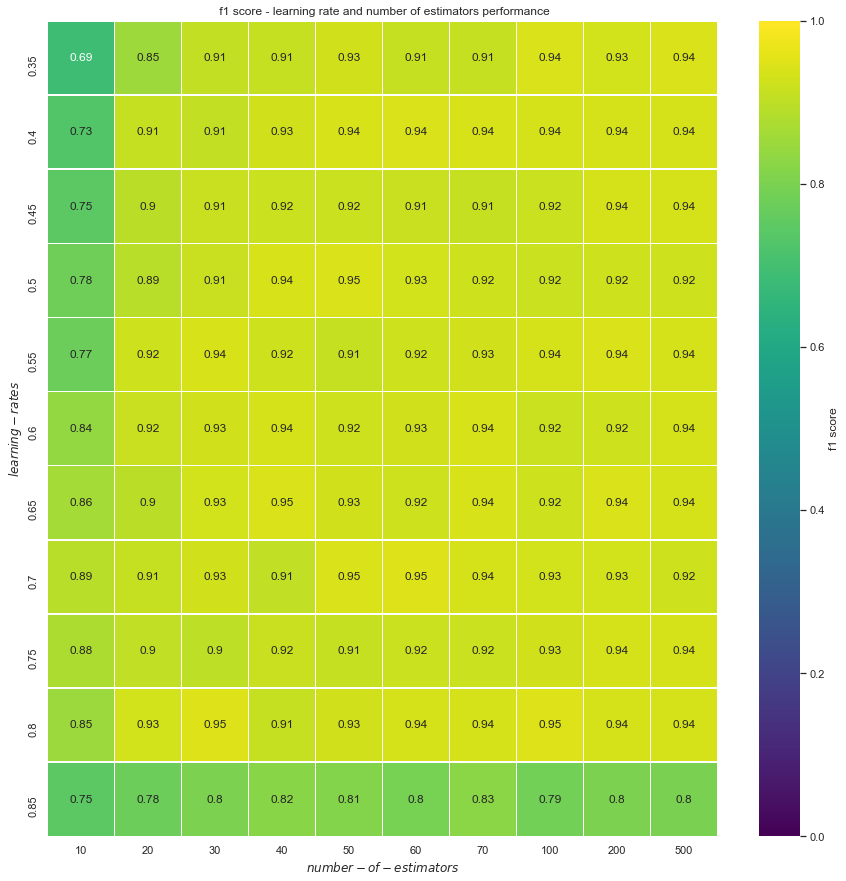

In [115]:
plt.figure(figsize=(16, 32))

learning_rates = [0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
n_estim = [10, 20, 30, 40, 50, 60, 70, 100, 200, 500]

f1s_gb = np.zeros((len(learning_rates), len(n_estim)))

highest_f1_gb = 0
lr_best = 0
es_best = 0

for lr in range(len(learning_rates)):
    for e in range(len(n_estim)):
        gb_clf_ = GradientBoostingClassifier(learning_rate=learning_rates[lr], max_depth = 3, max_leaf_nodes=5, n_estimators = n_estim[e])
        gb_clf_.fit(gb_x_train, gb_y_train)
        predictions_ = gb_clf_.predict(x_test)
        mydict_gb = classification_report(y_test, predictions_, output_dict=True)
        f1s_gb[lr][e] = mydict_gb["macro avg"]['f1-score']
        if f1s_gb[lr][e] > highest_f1_gb:
            highest_f1_gb=f1s_gb[lr][e]
            lr_best = learning_rates[lr]
            es_best = n_estim[e]
        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1s_gb, annot=True, ax=ax, cmap="viridis", xticklabels=n_estim, cbar_kws={'label': 'f1 score'}, yticklabels=learning_rates, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - learning rate and number of estimators performance")
ax.set_ylabel("$learning - rates$")
ax.set_xlabel("$number - of - estimators$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig41.png", bbox_inches='tight')

In [116]:
print("highest f1 score is {}% ".format(highest_f1_gb*100) + "with learning rate = {} ".format(lr_best) + "and number of weak learners = {} ".format(es_best))

highest f1 score is 94.87405520724231% with learning rate = 0.8 and number of weak learners = 30 


In [117]:
max_leaves = np.arange(2, 100, 3).tolist()
f1s_gb_2 = {}

for mln in range(len(max_leaves)):
    gb_clf_ = GradientBoostingClassifier(learning_rate=lr_best, max_leaf_nodes=max_leaves[mln], n_estimators = es_best)
    gb_clf_.fit(gb_x_train, gb_y_train)
    predictions_ = gb_clf_.predict(x_test)
    mydict_gb = classification_report(y_test, predictions_, output_dict=True)
    f1s_gb_2[max_leaves[mln]] = mydict_gb["macro avg"]['f1-score']

In [118]:
maxim = 0
best_leaves = 0
for leaves in f1s_gb_2.keys():
    if f1s_gb_2[leaves] > maxim:
        maxim = f1s_gb_2[leaves]
        best_leaves = leaves

print("Highest f1 score is {}% ".format(maxim*100) + "with {} ".format(best_leaves) +"leaf nodes and {} ".format(es_best) +"weak learners ")

Highest f1 score is 94.87405520724231% with 5 leaf nodes and 30 weak learners 


In [119]:
best_gb = GradientBoostingClassifier(learning_rate=lr_best, max_leaf_nodes=best_leaves, n_estimators = es_best)
best_gb.fit(gb_x_train, gb_y_train)

train_pred_gb_best = best_gb.predict(gb_x_train)
test_pred_gb_best = best_gb.predict(x_test)

best_acc_gb_train = classification_report(gb_y_train, train_pred_gb_best, output_dict=True)['accuracy']
best_acc_gb_test = classification_report(y_test, test_pred_gb_best, output_dict=True)['accuracy']
f1sc_gb = classification_report(y_test,test_pred_gb_best, output_dict=True)['macro avg']['f1-score']
f1sc_class0_gb = classification_report(y_test,test_pred_gb_best, output_dict=True)['0']['f1-score']
f1sc_class1_gb = classification_report(y_test,test_pred_gb_best, output_dict=True)['1']['f1-score']
f1sc_class2_gb = classification_report(y_test,test_pred_gb_best, output_dict=True)['2']['f1-score']
f1sc_class3_gb = classification_report(y_test,test_pred_gb_best, output_dict=True)['3']['f1-score']

final_matrix_results[6,] = [best_acc_gb_train, best_acc_gb_test, f1sc_gb, f1sc_class2_gb, 
                            f1sc_class0_gb, f1sc_class3_gb, f1sc_class1_gb]

print ("train accuracy = {} %\n".format(best_acc_gb_train*100))
print ("test accuracy = {} %\n".format(best_acc_gb_test*100))
print ("test f1 score = {} %\n".format(f1sc_gb*100))

print(classification_report(y_test,test_pred_gb_best))
print ("confusion matrix :")
print(confusion_matrix(y_test, test_pred_gb_best, labels=[2, 0, 3, 1]))

train accuracy = 99.9172870140612 %

test accuracy = 98.26589595375722 %

test f1 score = 94.87405520724231 %

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       118
           1       0.82      0.95      0.88        19
           2       1.00      1.00      1.00       358
           3       0.96      0.96      0.96        24

    accuracy                           0.98       519
   macro avg       0.94      0.96      0.95       519
weighted avg       0.98      0.98      0.98       519

confusion matrix :
[[357   1   0   0]
 [  1 112   1   4]
 [  0   1  23   0]
 [  0   1   0  18]]


accuracy = 98.26589595375722 %

test f1 score = 94.87405520724231 %



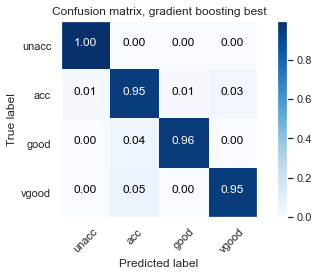

In [120]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, test_pred_gb_best,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("accuracy = {} %\n".format(classification_report(y_test, test_pred_gb_best, output_dict=True)['accuracy']*100))
print ("test f1 score = {} %\n".format(f1sc_gb*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, gradient boosting best', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig42.png", bbox_inches='tight')

In [121]:
max_leaves = np.arange(2, 40, 3).tolist()
print(max_leaves)
b_v_matrix_gb = np.zeros((13, 3))

for max_leaf_nod in range(len(max_leaves)):
    #print(max_leaf_nod)
    clf = GradientBoostingClassifier(learning_rate=lr_best, max_leaf_nodes=max_leaves[max_leaf_nod], n_estimators = es_best)
    print(max_leaf_nod)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, gb_x_train.to_numpy(), gb_y_train,
                                                                x_test.to_numpy(), y_test.to_numpy(), loss='0-1_loss', 
                                                                random_seed=123, num_rounds=5)
    b_v_matrix_gb[max_leaf_nod] = [avg_expected_loss, avg_bias, avg_var]

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38]
0
1
2
3
4
5
6
7
8
9
10
11
12


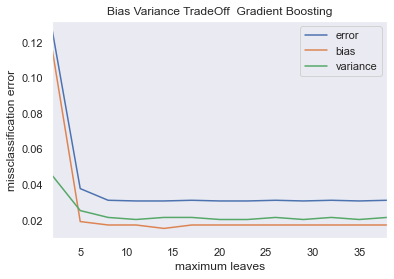

In [122]:
max_leaves = np.arange(2, 40, 3).tolist()
b_v_df_gb1 = pd.DataFrame(b_v_matrix_gb)
b_v_df_gb1.columns = ['error', 'bias', 'variance']
b_v_df_gb1['maximum leaves'] = max_leaves
b_v_df_gb1=b_v_df_gb1.set_index('maximum leaves')
b_v_df_gb1.plot(title = "Bias Variance TradeOff  Gradient Boosting")
plt.ylabel('missclassification error')
plt.xlabel('maximum leaves')
plt.grid(False)
sns.set_style("white")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig43.png", bbox_inches='tight')

PERCEPTRON #NOT INCLUDED BECAUSE OF VERY POOR PERFORMANCES AND NO FOCUS ON IT IN LECTURES

In [123]:
import copy
x_perceptron_train = x_train.copy()
y_perceptron_train = y_train.copy()
row = y_perceptron_train.shape[0]
y_perceptron_train =y_perceptron_train.values.reshape((row,))
from sklearn.linear_model import perceptron
clf = perceptron.Perceptron(penalty = 'l2',max_iter = 10,random_state = 20)
clf.fit(x_perceptron_train, y_perceptron_train)

#penalty: {‘l2’,’l1’,’elasticnet’}, default=None (The penalty (aka regularization term) to be used)
#alpha: float, default=0.0001 (Constant that multiplies the regularization term if regularization is used)
#l1_ratio: float, default=0.15 (The Elastic Net mixing parameter, [0,1], 0 is L2, 1 is L1)
#max_iter: int, default=1000 (The maximum number of passes over the training data (aka epochs))


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty='l2', random_state=20, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
predictions = clf.predict(x_perceptron_train)
accuracy = clf.score(x_perceptron_train,y_perceptron_train)
print ("Accuracy = {}%\n".format(accuracy*100))
print ("f1 score = {}%\n".format(classification_report(y_perceptron_train, predictions, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_perceptron_train,predictions))
print ("confusion matrix :")
print(confusion_matrix(y_perceptron_train, predictions, labels=[2, 0, 3, 1]))

Accuracy = 70.71960297766749%

f1 score = 25.533573725757723%

              precision    recall  f1-score   support

           0       0.44      0.12      0.19       266
           1       0.00      0.00      0.00        50
           2       0.72      0.96      0.83       852
           3       0.00      0.00      0.00        41

    accuracy                           0.71      1209
   macro avg       0.29      0.27      0.26      1209
weighted avg       0.61      0.71      0.63      1209

confusion matrix :
[[822  30   0   0]
 [233  33   0   0]
 [ 32   9   0   0]
 [ 47   3   0   0]]


Accuracy = 70.71960297766749 %

f1 score = 25.533573725757723%



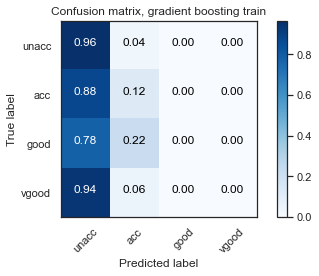

In [125]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_perceptron_train, predictions,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy*100))
print ("f1 score = {}%\n".format(classification_report(y_perceptron_train, predictions, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, gradient boosting train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig44.png", bbox_inches='tight')

In [126]:
predictions_test = clf.predict(x_test)
accuracy_test = clf.score(x_test, y_test)
print ("Accuracy={} %\n".format(accuracy_test*100))
print ("f1 score = {}%\n".format(classification_report(y_test, predictions_test, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_test,predictions_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, predictions_test, labels=[2, 0, 3, 1]))

Accuracy=70.13487475915221 %

f1 score = 28.19505915704822%

              precision    recall  f1-score   support

           0       0.53      0.22      0.31       118
           1       0.00      0.00      0.00        19
           2       0.72      0.94      0.82       358
           3       0.00      0.00      0.00        24

    accuracy                           0.70       519
   macro avg       0.31      0.29      0.28       519
weighted avg       0.62      0.70      0.63       519

confusion matrix :
[[338  20   0   0]
 [ 92  26   0   0]
 [ 22   2   0   0]
 [ 18   1   0   0]]


Accuracy = 70.13487475915221 %

f1 score = 28.19505915704822 %



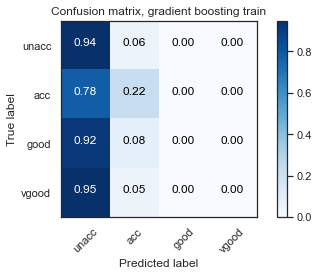

In [127]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predictions_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy_test*100))
print ("f1 score = {} %\n".format(classification_report(y_test, predictions_test, output_dict=True)['macro avg']['f1-score']*100))
 

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, gradient boosting train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig45.png", bbox_inches='tight')

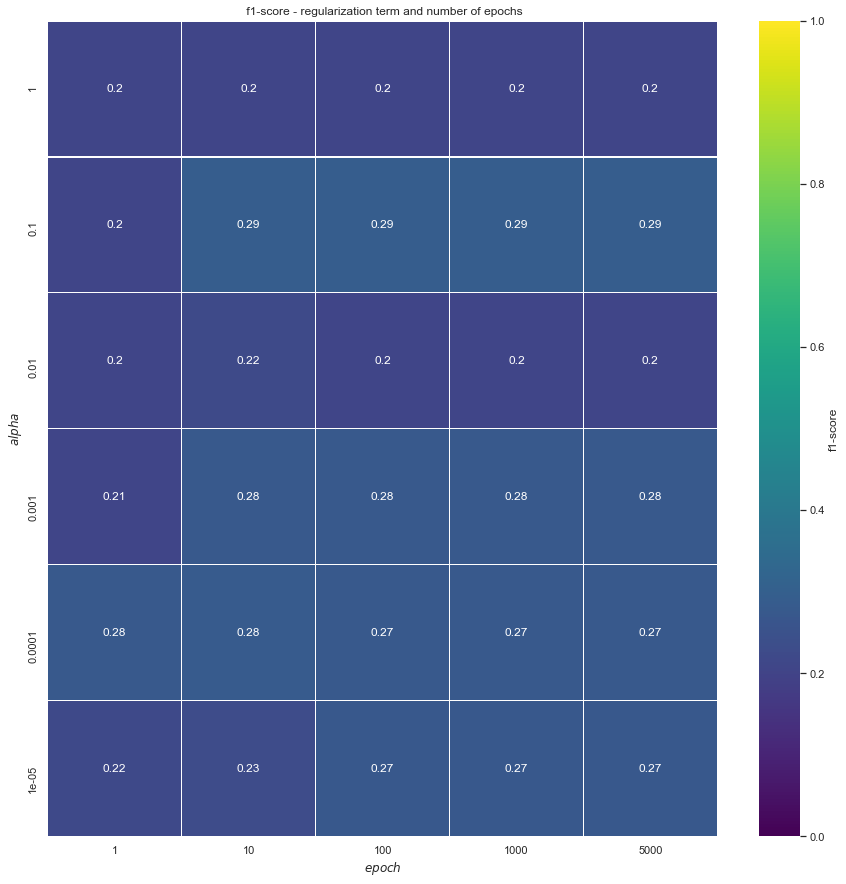

In [128]:
alphas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
epochs = [1, 10, 100, 1000, 5000]

f1_pr = np.zeros((len(alphas), len(epochs)))

for a in range(len(alphas)):
    for e in range(len(epochs)):
        clf_ = perceptron.Perceptron(alpha=alphas[a], penalty='l2',max_iter=epochs[e],random_state=20)
        clf_.fit(x_perceptron_train, y_perceptron_train)
        predictions_ = clf_.predict(x_test)
        mydict_pr = classification_report(y_test, predictions_, output_dict=True)
        f1_pr[a][e] = mydict_pr["macro avg"]['f1-score']        
        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1_pr, annot=True, ax=ax, cmap="viridis", xticklabels=epochs, cbar_kws={'label': 'f1-score'}, yticklabels=alphas, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1-score - regularization term and number of epochs")
ax.set_ylabel("$alpha$")
ax.set_xlabel("$epoch$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig46.png", bbox_inches='tight')

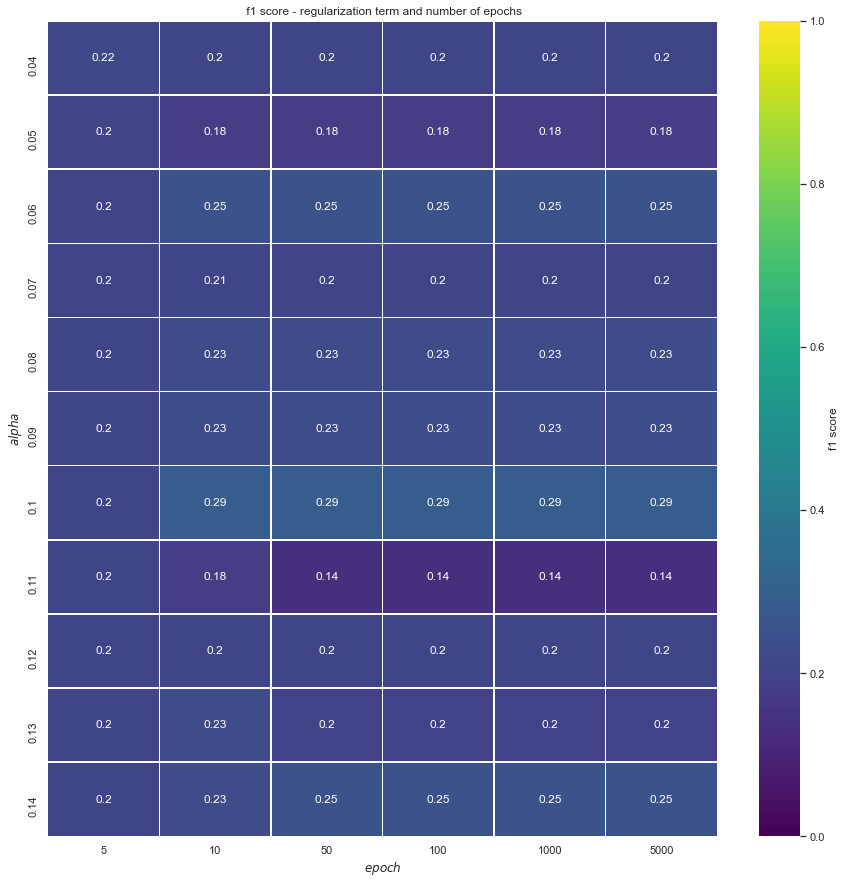

In [129]:
alphas = [0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14]
epochs = [5, 10, 50, 100, 1000, 5000]

highest_f1_per = 0
best_alp = 0
best_ep = 0

f1s_pr = np.zeros((len(alphas), len(epochs)))

for a in range(len(alphas)):
    for e in range(len(epochs)):
        clf_ = perceptron.Perceptron(alpha=alphas[a], penalty='l2',max_iter=epochs[e],random_state=20)
        clf_.fit(x_perceptron_train, y_perceptron_train)
        predictions_ = clf_.predict(x_test)
        mydict_pr = classification_report(y_test, predictions_, output_dict=True)
        f1s_pr[a][e] = mydict_pr["macro avg"]['f1-score']  
        if f1s_pr[a][e] > highest_f1_per:
            highest_f1_per = f1s_pr[a][e]
            best_alp = alphas[a]
            best_ep = epochs[e]
        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1s_pr, annot=True, ax=ax, cmap="viridis", xticklabels=epochs, cbar_kws={'label': 'f1 score'}, yticklabels=alphas, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - regularization term and number of epochs")
ax.set_ylabel("$alpha$")
ax.set_xlabel("$epoch$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig47.png", bbox_inches='tight')

In [130]:
print("Highest f1 score is {}% ".format(highest_f1_per*100) + "with regularization term = {} ".format(best_alp) + "and {} ".format(best_ep)+ "epochs")

Highest f1 score is 28.98112401943227% with regularization term = 0.1 and 10 epochs


In [131]:
perc_best = perceptron.Perceptron(penalty = 'l2',alpha = best_alp, max_iter = best_ep, random_state = 20)
perc_best.fit(x_perceptron_train, y_perceptron_train)

train_pred_per_best = perc_best.predict(x_perceptron_train)
test_pred_per_best = perc_best.predict(x_test)

best_acc_per_train = classification_report(y_perceptron_train, train_pred_per_best, output_dict=True)['accuracy']
best_acc_per_test = classification_report(y_test, test_pred_per_best, output_dict=True)['accuracy']
f1sc_per = classification_report(y_test,test_pred_per_best, output_dict=True)['macro avg']['f1-score']
f1sc_class0_per = classification_report(y_test,test_pred_per_best, output_dict=True)['0']['f1-score']
f1sc_class1_per = classification_report(y_test,test_pred_per_best, output_dict=True)['1']['f1-score']
f1sc_class2_per = classification_report(y_test,test_pred_per_best, output_dict=True)['2']['f1-score']
f1sc_class3_per = classification_report(y_test,test_pred_per_best, output_dict=True)['3']['f1-score']

final_matrix_results[7,] = [best_acc_per_train, best_acc_per_test, f1sc_per, f1sc_class2_per, 
                            f1sc_class0_per, f1sc_class3_per, f1sc_class1_per]

print ("train accuracy = {} %\n".format(best_acc_per_train*100))
print ("test accuracy = {} %\n".format(best_acc_per_test*100))
print ("test f1 score = {} %\n".format(f1sc_per*100))

print(classification_report(y_test,test_pred_per_best))
print ("confusion matrix :")
print(confusion_matrix(y_test, test_pred_per_best, labels=[2, 0, 3, 1]))

train accuracy = 56.90653432588917 %

test accuracy = 54.33526011560693 %

test f1 score = 28.98112401943227 %

              precision    recall  f1-score   support

           0       0.30      0.68      0.41       118
           1       0.14      0.05      0.08        19
           2       0.83      0.56      0.67       358
           3       0.00      0.00      0.00        24

    accuracy                           0.54       519
   macro avg       0.32      0.32      0.29       519
weighted avg       0.64      0.54      0.56       519

confusion matrix :
[[201 152   0   5]
 [ 37  80   0   1]
 [  2  22   0   0]
 [  3  15   0   1]]


Accuracy = 54.33526011560693 %

test f1 score = 28.98112401943227 %



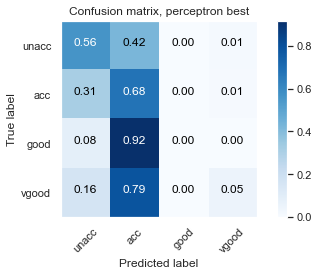

In [132]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, test_pred_per_best,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(best_acc_per_test*100))
print ("test f1 score = {} %\n".format(f1sc_per*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, perceptron best', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig48.png", bbox_inches='tight')

KNN

In [133]:
import copy
x_knn_train=x_train.copy()
y_knn_train=y_train.copy()
row = y_knn_train.shape[0]
y_knn_train=y_knn_train.values.reshape((row,))
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_knn_train,y_knn_train)

#n_neighbors: int, default=5 
#weights: {‘uniform’, ‘distance’} (Weight function used in prediction, 'uniform' all points weighted equally; 'distance': weight points by the inverse of their distance)
#p: int, default=2 (Power parameter for the Minkowski metric. p02 is Euclidean, p=1 is manhattan)
#metric: str or callable, default=’minkowski’

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [134]:
predictions = clf.predict(x_knn_train)
accuracy=clf.score(x_knn_train,y_knn_train)
print ("Accuracy={} %\n".format(accuracy*100))
print ("f1 score = {} %\n".format(classification_report(y_knn_train,predictions, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_knn_train,predictions))
print ("confusion matrix :")
print(confusion_matrix(y_knn_train, predictions, labels=[2, 0, 3, 1]))

Accuracy=95.28535980148884 %

f1 score = 88.76177578234736 %

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       266
           1       0.82      0.72      0.77        50
           2       0.98      0.99      0.98       852
           3       1.00      0.83      0.91        41

    accuracy                           0.95      1209
   macro avg       0.92      0.86      0.89      1209
weighted avg       0.95      0.95      0.95      1209

confusion matrix :
[[844   8   0   0]
 [ 20 238   0   8]
 [  0   7  34   0]
 [  1  13   0  36]]


Accuracy = 95.28535980148884 %

f1 score = 88.76177578234736 %



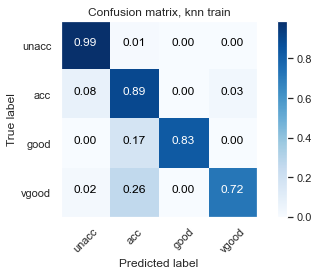

In [135]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_knn_train, predictions,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy*100))
print ("f1 score = {} %\n".format(classification_report(y_knn_train,predictions, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, knn train', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig49.png", bbox_inches='tight')

In [136]:
predictions_test = clf.predict(x_test)
accuracy_test = clf.score(x_test,y_test)
print ("Accuracy={} %\n".format(accuracy_test*100))
print ("f1 score = {} %\n".format(classification_report(y_test,predictions_test, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_test,predictions_test))
print ("confusion matrix :")
print(confusion_matrix(y_test, predictions_test, labels=[2, 0, 3, 1]))

Accuracy=86.70520231213872 %

f1 score = 68.06650352327124 %

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       118
           1       0.54      0.37      0.44        19
           2       0.93      0.96      0.94       358
           3       0.92      0.46      0.61        24

    accuracy                           0.87       519
   macro avg       0.77      0.63      0.68       519
weighted avg       0.86      0.87      0.86       519

confusion matrix :
[[344  14   0   0]
 [ 25  88   1   4]
 [  1  10  11   2]
 [  1  11   0   7]]


Accuracy = 86.70520231213872 %

f1 score = 68.06650352327124 %



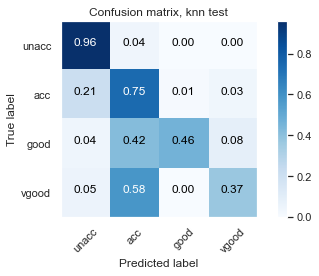

In [137]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predictions_test,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy_test*100))
print ("f1 score = {} %\n".format(classification_report(y_test,predictions_test, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, knn test', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig50.png", bbox_inches='tight')

In [138]:
neighbors = [1, 5, 10, 50, 100, 150, 200, 250, 300, 346]
f1_knn = {}

for n in range(len(neighbors)):
    clf = KNeighborsClassifier(n_neighbors=neighbors[n])
    clf.fit(x_knn_train,y_knn_train)
    predictions_ = clf.predict(x_test)
    mydict_knn = classification_report(y_test, predictions_, output_dict=True)
    f1_knn[neighbors[n]] = mydict_knn["macro avg"]['f1-score']        
        
for f in f1_knn.keys():
    print ("f1 score with {} ".format(f) + "neighbors is = {} %\n".format(f1_knn[f]*100))

f1 score with 1 neighbors is = 74.80688876484687 %

f1 score with 5 neighbors is = 76.25075927483412 %

f1 score with 10 neighbors is = 75.83640451755507 %

f1 score with 50 neighbors is = 31.69652071354858 %

f1 score with 100 neighbors is = 21.73351736052429 %

f1 score with 150 neighbors is = 20.41049030786773 %

f1 score with 200 neighbors is = 20.41049030786773 %

f1 score with 250 neighbors is = 20.41049030786773 %

f1 score with 300 neighbors is = 20.41049030786773 %

f1 score with 346 neighbors is = 20.41049030786773 %



In [139]:
neighbors2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f1_knn2 = {}

for n in range(len(neighbors2)):
    clf = KNeighborsClassifier(n_neighbors=neighbors2[n])
    clf.fit(x_knn_train,y_knn_train)
    predictions_ = clf.predict(x_test)
    mydict_knn = classification_report(y_test, predictions_, output_dict=True)
    f1_knn2[neighbors2[n]] = mydict_knn["macro avg"]['f1-score']       
        
for f in f1_knn2.keys():
    print ("f1 score with {} ".format(f) + "neighbors is = {} %\n".format(f1_knn2[f]*100))

f1 score with 1 neighbors is = 74.80688876484687 %

f1 score with 2 neighbors is = 59.17591830443776 %

f1 score with 3 neighbors is = 68.06650352327124 %

f1 score with 4 neighbors is = 70.84357704436445 %

f1 score with 5 neighbors is = 76.25075927483412 %

f1 score with 6 neighbors is = 83.08172345997406 %

f1 score with 7 neighbors is = 86.99292374811681 %

f1 score with 8 neighbors is = 82.14023239451969 %

f1 score with 9 neighbors is = 79.85706324287557 %

f1 score with 10 neighbors is = 75.83640451755507 %



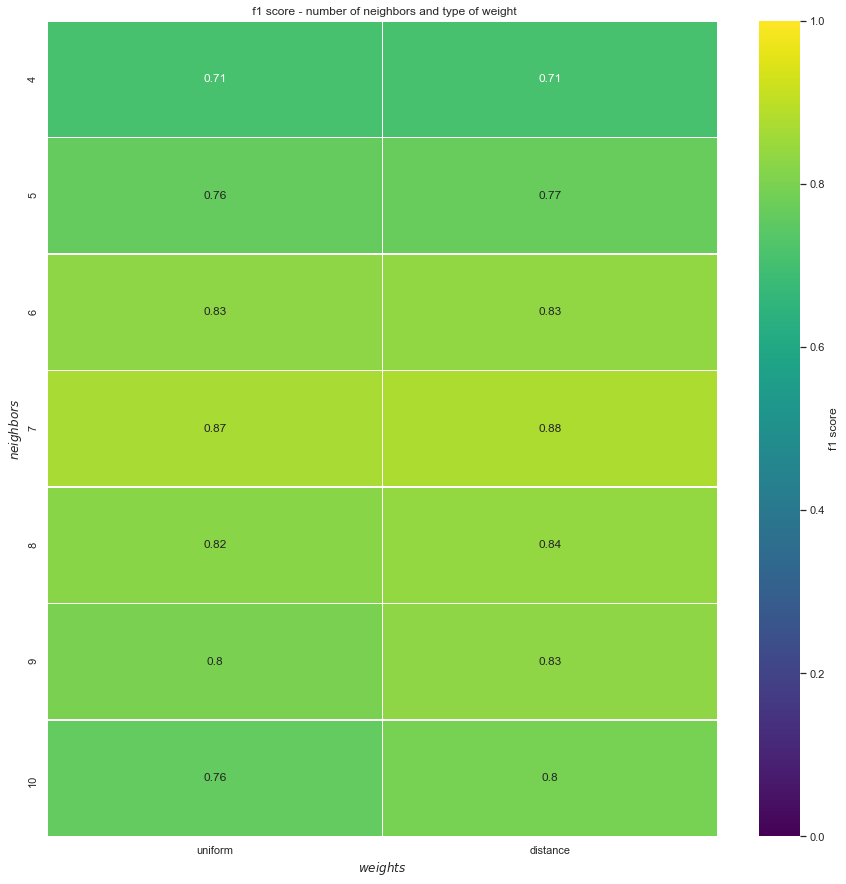

In [140]:
weights = ['uniform', 'distance']
neighbors2 = [4, 5, 6, 7, 8, 9, 10]

f1s_knn3 = np.zeros((len(neighbors2), len(weights)))

highest_f1_knn = 0
best_neigh = 0
best_dist = ''

for n in range(len(neighbors2)):
    for w in range(len(weights)):
        clf = KNeighborsClassifier(weights=weights[w], n_neighbors=neighbors2[n])
        clf.fit(x_knn_train,y_knn_train)
        predictions_ = clf.predict(x_test)
        mydict_knn = classification_report(y_test, predictions_, output_dict=True)
        f1s_knn3[n][w] = mydict_knn["macro avg"]['f1-score']         
        if f1s_knn3[n][w] > highest_f1_knn:
            highest_f1_knn = f1s_knn3[n][w]
            best_dist = weights[w]
            best_neigh = neighbors2[n]
        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1s_knn3, annot=True, ax=ax, cmap="viridis", xticklabels=weights, cbar_kws={'label': 'f1 score'}, yticklabels=neighbors2, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - number of neighbors and type of weight")
ax.set_ylabel("$neighbors$")
ax.set_xlabel("$weights$")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig51.png", bbox_inches='tight')

In [141]:
print("Highest f1 score is {}% ".format(highest_f1_knn*100) + "with {} ".format(best_neigh) + "neighbours and distance method = " + best_dist)

Highest f1 score is 87.81916497868116% with 7 neighbours and distance method = distance


In [142]:
best_knn = KNeighborsClassifier(n_neighbors=best_neigh, weights=best_dist)
best_knn.fit(x_knn_train,y_knn_train)

train_pred_knn_best = best_knn.predict(x_knn_train)
test_pred_knn_best = best_knn.predict(x_test)

best_acc_knn_train = classification_report(y_knn_train, train_pred_knn_best, output_dict=True)['accuracy']
best_acc_knn_test = classification_report(y_test, test_pred_knn_best, output_dict=True)['accuracy']
f1sc_knn = classification_report(y_test,test_pred_knn_best, output_dict=True)['macro avg']['f1-score']
f1sc_class0_knn = classification_report(y_test,test_pred_knn_best, output_dict=True)['0']['f1-score']
f1sc_class1_knn = classification_report(y_test,test_pred_knn_best, output_dict=True)['1']['f1-score']
f1sc_class2_knn = classification_report(y_test,test_pred_knn_best, output_dict=True)['2']['f1-score']
f1sc_class3_knn = classification_report(y_test,test_pred_knn_best, output_dict=True)['3']['f1-score']

final_matrix_results[7,] = [best_acc_knn_train, best_acc_knn_test, f1sc_knn, f1sc_class2_knn, 
                            f1sc_class0_knn, f1sc_class3_knn, f1sc_class1_knn]

print ("train accuracy = {} %\n".format(best_acc_knn_train*100))
print ("test accuracy = {} %\n".format(best_acc_knn_test*100))
print ("test f1 score = {} %\n".format(f1sc_knn*100))

print(classification_report(y_test,test_pred_knn_best))
print ("confusion matrix :")
print(confusion_matrix(y_test, test_pred_knn_best, labels=[2, 0, 3, 1]))

train accuracy = 100.0 %

test accuracy = 92.67822736030828 %

test f1 score = 87.81916497868116 %

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       118
           1       0.93      0.74      0.82        19
           2       0.93      0.99      0.96       358
           3       0.91      0.88      0.89        24

    accuracy                           0.93       519
   macro avg       0.92      0.84      0.88       519
weighted avg       0.93      0.93      0.92       519

confusion matrix :
[[355   3   0   0]
 [ 25  91   1   1]
 [  1   2  21   0]
 [  0   4   1  14]]


Accuracy = 92.67822736030828 %

test f1 score = 87.81916497868116 %



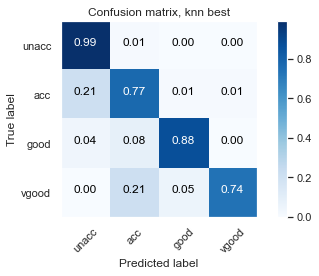

In [143]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, test_pred_knn_best,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(best_acc_knn_test*100))
print ("test f1 score = {} %\n".format(f1sc_knn*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, knn best', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig52.png", bbox_inches='tight')

In [144]:
neighbours = np.arange(1, 200, 1).tolist()
#print(neighbours)
b_v_matrix_knn = np.zeros((200, 3))

for n in range(len(neighbours)):
    #print(max_leaf_nod)
    clf =  KNeighborsClassifier(n_neighbors=neighbours[n], weights=best_dist)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, x_knn_train.to_numpy(), y_knn_train,
                                                                x_test.to_numpy(), y_test.to_numpy(), loss='0-1_loss', 
                                                                random_seed=123, num_rounds=5)
    b_v_matrix_knn[n] = [avg_expected_loss, avg_bias, avg_var]

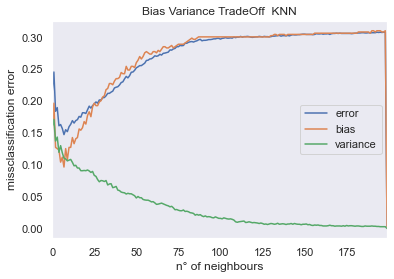

In [145]:
b_v_df_knn = pd.DataFrame(b_v_matrix_knn)
b_v_df_knn.columns = ['error', 'bias', 'variance']
b_v_df_knn.plot(title = "Bias Variance TradeOff  KNN")
plt.ylabel('missclassification error')
plt.xlabel('n° of neighbours')
plt.grid(False)
sns.set_style("white")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig53.png", bbox_inches='tight')

In [146]:
minim = min([i for i in b_v_df_knn.iloc[1:,0] if i > 0])
print(b_v_df_knn[b_v_df_knn['error'] == minim])

      error      bias  variance
7  0.147206  0.096339  0.110212


RANDOM FOREST

In [147]:
import copy
x_rf_train=x_train.copy()
y_rf_train=y_train.copy()
row= y_rf_train.shape[0]
y_rf_train=y_rf_train.values.reshape((row,))
from sklearn.ensemble import RandomForestClassifier
clf_e = RandomForestClassifier(random_state=20,criterion='entropy')
clf_e.fit(x_rf_train, y_rf_train)

#n_estimators: int, default=100 (The number of trees in the forest)
#criterion: {“gini”, “entropy”}, default='gini'
#min_samples_split: int or float, default=2 (The minimum number of samples required to split an internal node)
#min_samples_leaf: int or float, default=1 (The minimum number of samples required to be at a leaf node)
# max_leaf_nodes: int, default=None
#bootstrap: bool, default=True (Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree)
#ccp_alpha: non-negative float, default=0.0 (Complexity parameter used for Minimal Cost-Complexity Pruning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [148]:
predictions_e = clf_e.predict(x_rf_train)
accuracy_e = clf_e.score(x_rf_train,y_rf_train)
print ("Accuracy = {} %\n".format(accuracy_e*100))
print ("f1 score = {} %\n".format(classification_report(y_rf_train,predictions_e, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_rf_train,predictions_e))
print ("confusion matrix :")
print(confusion_matrix(y_rf_train,predictions_e, labels=[2, 0, 3, 1]))

Accuracy = 99.75186104218362 %

f1 score = 99.35388100720348 %

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       266
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00       852
           3       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       0.99      1.00      0.99      1209
weighted avg       1.00      1.00      1.00      1209

confusion matrix :
[[851   1   0   0]
 [  0 264   0   2]
 [  0   0  41   0]
 [  0   0   0  50]]


Accuracy = 99.75186104218362 %

f1 score = 99.35388100720348 %



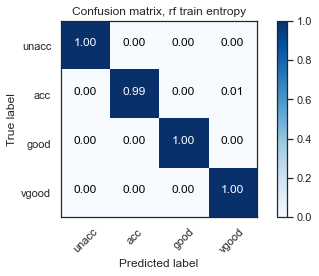

In [149]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_rf_train, predictions_e,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy_e*100))
print ("f1 score = {} %\n".format(classification_report(y_rf_train,predictions_e, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, rf train entropy', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig54.png", bbox_inches='tight')

In [150]:
predictions_test_e = clf_e.predict(x_test)
accuracy_test_e = clf_e.score(x_test,y_test)
print ("Accuracy={} %\n".format(accuracy_test_e*100))
print ("f1 score = {} %\n".format(classification_report(y_test,predictions_test_e, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_test,predictions_test_e))
print ("confusion matrix :")
print(confusion_matrix(y_test,predictions_test_e, labels=[2, 0, 3, 1]))

Accuracy=95.56840077071291 %

f1 score = 90.45771856825415 %

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       118
           1       0.75      0.95      0.84        19
           2       0.99      0.98      0.98       358
           3       0.91      0.88      0.89        24

    accuracy                           0.96       519
   macro avg       0.89      0.93      0.90       519
weighted avg       0.96      0.96      0.96       519

confusion matrix :
[[350   8   0   0]
 [  3 107   2   6]
 [  0   3  21   0]
 [  0   1   0  18]]


Accuracy = 95.56840077071291 %

f1 score = 90.45771856825415 %



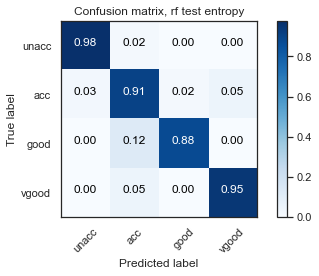

In [151]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predictions_test_e,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy_test_e*100))
print ("f1 score = {} %\n".format(classification_report(y_test,predictions_test_e, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, rf test entropy', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig55.png", bbox_inches='tight')

In [152]:
clf_g = RandomForestClassifier(random_state=20,criterion='gini')
clf_g.fit(x_rf_train, y_rf_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [153]:
predictions_g = clf_g.predict(x_rf_train)
accuracy_g = clf_g.score(x_rf_train,y_rf_train)
print ("Accuracy={} %\n".format(accuracy_g*100))
print ("f1 score = {} %\n".format(classification_report(y_rf_train,predictions_g, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_rf_train,predictions_g))
print ("confusion matrix :")
print(confusion_matrix(y_rf_train,predictions_g, labels=[2, 0, 3, 1]))

Accuracy=99.9172870140612 %

f1 score = 99.93841570829096 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00       852
           3       1.00      1.00      1.00        41

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

confusion matrix :
[[851   1   0   0]
 [  0 266   0   0]
 [  0   0  41   0]
 [  0   0   0  50]]


Accuracy = 99.9172870140612 %

f1 score = 99.93841570829096 %



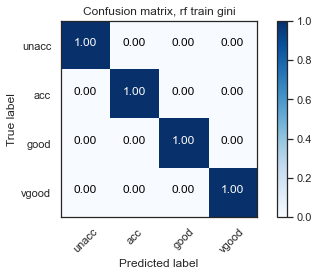

In [154]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_rf_train, predictions_g,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy_g*100))
print ("f1 score = {} %\n".format(classification_report(y_rf_train,predictions_g, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, rf train gini', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig56.png", bbox_inches='tight')

In [155]:
predictions_test_g = clf_g.predict(x_test)
accuracy_test_g = clf_g.score(x_test,y_test)
print ("Accuracy={} %\n".format(accuracy_test_g*100))
print ("f1 score = {} %\n".format(classification_report(y_test,predictions_test_g, output_dict=True)['macro avg']['f1-score']*100))
print(classification_report(y_test,predictions_test_g))
print ("confusion matrix :")
print(confusion_matrix(y_test,predictions_test_g, labels=[2, 0, 3, 1]))

Accuracy=95.18304431599229 %

f1 score = 89.75903430550706 %

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       118
           1       0.72      0.95      0.82        19
           2       0.99      0.97      0.98       358
           3       0.95      0.83      0.89        24

    accuracy                           0.95       519
   macro avg       0.89      0.92      0.90       519
weighted avg       0.95      0.95      0.95       519

confusion matrix :
[[349   9   0   0]
 [  5 107   1   5]
 [  0   2  20   2]
 [  0   1   0  18]]


Accuracy = 95.18304431599229 %

f1 score = 89.75903430550706 %



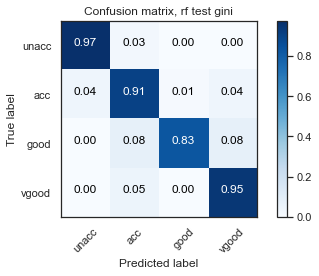

In [156]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, predictions_test_g,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(accuracy_test_g*100))
print ("f1 score = {} %\n".format(classification_report(y_test,predictions_test_g, output_dict=True)['macro avg']['f1-score']*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, rf test gini', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig57.png", bbox_inches='tight')

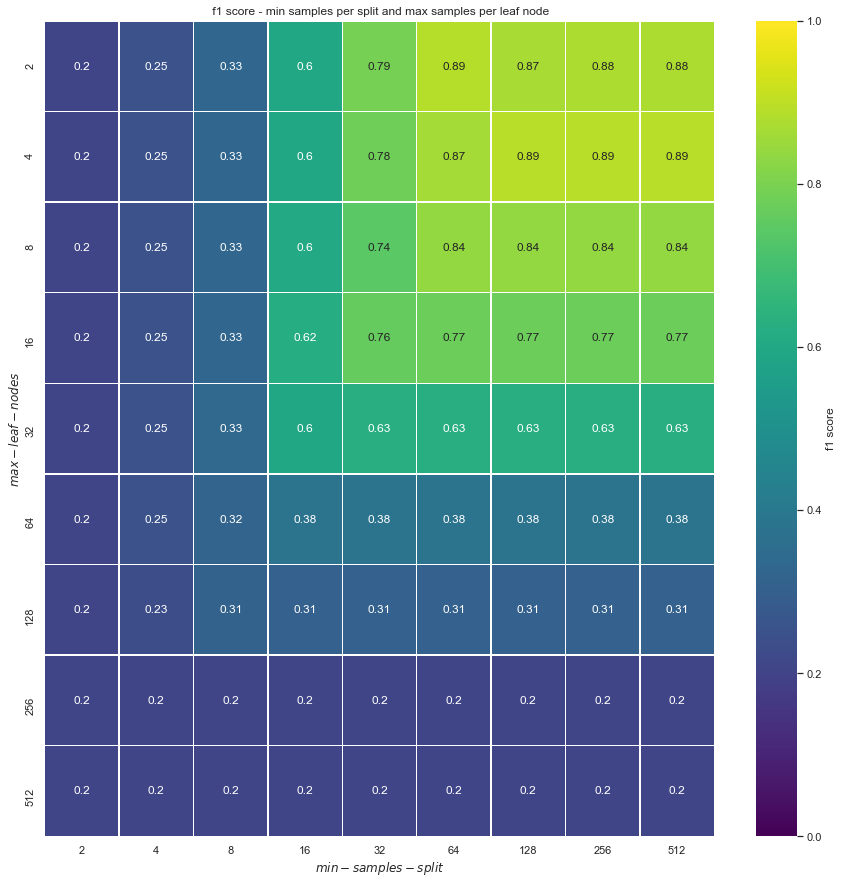

In [157]:
samples_per_split = [2, 4, 8, 16, 32, 64, 128, 256, 512]
max_leaf_node = [2, 4, 8, 16, 32, 64, 128, 256, 512]
f1s_rf = np.zeros((len(samples_per_split), len(max_leaf_node)))

highest_f1_rf = 0
best_ss = 0
best_mln = 0

for ss in range(len(samples_per_split)):
    for ln in range(len(max_leaf_node)):
        clf_ = RandomForestClassifier(random_state=20,criterion='entropy', min_samples_split=samples_per_split[ss], max_leaf_nodes=max_leaf_node[ln])
        clf_.fit(x_rf_train, y_rf_train)
        predictions_ = clf_.predict(x_test)
        accuracy_ = clf_.score(x_test,y_test)
        mydict_rf = classification_report(y_test, predictions_, output_dict=True)
        f1s_rf[ss][ln] = mydict_rf["macro avg"]['f1-score']     
        if f1s_rf[ss][ln] > highest_f1_rf:
            highest_f1_rf = f1s_rf[ss][ln]
            best_ss = samples_per_split[ss]
            best_mln = max_leaf_node[ln]
        
sns.set()
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(f1s_rf, annot=True, ax=ax, cmap="viridis", xticklabels=samples_per_split, cbar_kws={'label': 'f1 score'}, yticklabels=max_leaf_node, vmin=0, vmax=1, linewidths=.5)
ax.set_title(" f1 score - min samples per split and max samples per leaf node")
ax.set_ylabel("$max - leaf - nodes$")
ax.set_xlabel("$min - samples - split$")     
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig58.png", bbox_inches='tight')

In [158]:
print("highest f1 score is {}% ".format(highest_f1_rf*100) +" with min samples per split = {} ".format(best_ss)+"and max leaf nodes {}".format(best_mln))

highest f1 score is 89.37360147522737%  with min samples per split = 4 and max leaf nodes 128


In [159]:
best_rf = RandomForestClassifier(random_state=20,criterion='entropy', min_samples_split=best_ss, max_leaf_nodes=best_mln)
best_rf.fit(x_rf_train, y_rf_train)

train_pred_rf_best = best_rf.predict(x_rf_train)
test_pred_rf_best = best_rf.predict(x_test)

best_acc_rf_train = classification_report(y_rf_train, train_pred_rf_best, output_dict=True)['accuracy']
best_acc_rf_test = classification_report(y_test, test_pred_rf_best, output_dict=True)['accuracy']
f1sc_rf = classification_report(y_test,test_pred_rf_best, output_dict=True)['macro avg']['f1-score']
f1sc_class0_rf = classification_report(y_test,test_pred_rf_best, output_dict=True)['0']['f1-score']
f1sc_class1_rf = classification_report(y_test,test_pred_rf_best, output_dict=True)['1']['f1-score']
f1sc_class2_rf = classification_report(y_test,test_pred_rf_best, output_dict=True)['2']['f1-score']
f1sc_class3_rf = classification_report(y_test,test_pred_rf_best, output_dict=True)['3']['f1-score']

final_matrix_results[8,] = [best_acc_rf_train, best_acc_rf_test, f1sc_rf, f1sc_class2_rf, 
                            f1sc_class0_rf, f1sc_class3_rf, f1sc_class1_rf]

print ("train accuracy = {} %\n".format(best_acc_rf_train*100))
print ("test accuracy = {} %\n".format(best_acc_rf_test*100))
print ("test f1 score = {} %\n".format(f1sc_rf*100))

print(classification_report(y_test,test_pred_rf_best))
print ("confusion matrix :")
print(confusion_matrix(y_test, test_pred_rf_best, labels=[2, 0, 3, 1]))

train accuracy = 99.50372208436724 %

test accuracy = 95.56840077071291 %

test f1 score = 89.37360147522737 %

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       118
           1       0.74      0.89      0.81        19
           2       0.98      0.99      0.99       358
           3       0.88      0.88      0.88        24

    accuracy                           0.96       519
   macro avg       0.88      0.91      0.89       519
weighted avg       0.96      0.96      0.96       519

confusion matrix :
[[354   4   0   0]
 [  6 104   2   6]
 [  0   3  21   0]
 [  0   1   1  17]]


Accuracy = 95.56840077071291 %

test f1 score = 89.37360147522737 %



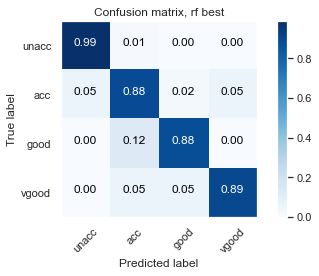

In [160]:
plt.grid(False)

cnf_matrix = confusion_matrix(y_test, test_pred_rf_best,labels=[2, 0, 3, 1])
np.set_printoptions(precision=2)

print ("Accuracy = {} %\n".format(best_acc_rf_test*100))
print ("test f1 score = {} %\n".format(f1sc_rf*100))

plot_confusion_matrix(cnf_matrix, classes=['unacc', 'acc', 'good', 'vgood'],
                      title='Confusion matrix, rf best', normalize = True)
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig59.png", bbox_inches='tight')

In [161]:
b_v_matrix_rf = np.zeros((150, 3))

for maxleafnodes in range(2, 150):
    print(maxleafnodes)
    rf = RandomForestClassifier(random_state=20,criterion='entropy', 
                                          min_samples_split=best_ss, max_leaf_nodes=maxleafnodes)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(rf, x_rf_train.to_numpy(), y_rf_train,
                                                                x_test.to_numpy(), y_test.to_numpy(), loss='0-1_loss', 
                                                                random_seed=123)
    b_v_matrix_rf[maxleafnodes] = [avg_expected_loss, avg_bias, avg_var]

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


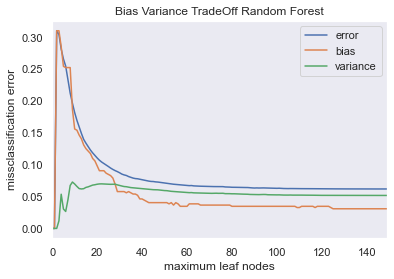

In [162]:
b_v_df_rf = pd.DataFrame(b_v_matrix_rf)
b_v_df_rf.columns = ['error', 'bias', 'variance']
b_v_df_rf.plot(title = "Bias Variance TradeOff Random Forest")
plt.ylabel('missclassification error')
plt.xlabel('maximum leaf nodes')
plt.grid(False)
sns.set_style("white")
plt.savefig("C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig60.png")

In [163]:
final = pd.DataFrame(final_matrix_results)
final.columns = ['train accuracy', 'test accuracy', 'f1 score', 'f1 - unacc', 'f1 - acc', 'f1 - good', 'f1 - vgood']
final.index = ['decsion tree', 'neural network', 'svm', 'logistic regression', 'bagging', 'adaboost', 'gradient boosting', 'knn', 'random forest']
final

,train accuracy,test accuracy,f1 score,f1 - unacc,f1 - acc,f1 - good,f1 - vgood
decsion tree,1.000000,0.973025,0.926405,0.994398,0.940678,0.933333,0.837209
neural network,0.980976,0.961464,0.917073,0.983240,0.924370,0.888889,0.871795
svm,1.000000,0.986513,0.952880,0.998605,0.974138,0.938776,0.900000
logistic regression,0.712159,0.684008,0.280784,0.819216,0.303922,0.000000,0.000000
bagging,1.000000,0.973025,0.915956,0.995792,0.945148,0.893617,0.829268
adaboost,0.866832,0.888247,0.814476,0.942149,0.751131,0.897959,0.666667
gradient boosting,0.999173,0.982659,0.948741,0.997207,0.961373,0.958333,0.878049
knn,1.000000,0.926782,0.878192,0.960758,0.834862,0.893617,0.823529
random forest,0.995037,0.955684,0.893736,0.986072,0.904348,0.875000,0.809524


In [164]:
import dataframe_image as dfi
dfi.export(final, 'C:/Users/cmira/Desktop/FYSSTK/PROJECT 3/fig100.png')